In [77]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
file_path = 'DataCoSupplyChainDataset.csv'  # Đường dẫn tới file CSV của bạn
data = pd.read_csv(file_path, encoding='latin1')  # Đọc dữ liệu và xử lý lỗi mã hóa

# Xem thông tin cơ bản về dữ liệu
print(data.head())  # Hiển thị 5 dòng đầu tiên của dữ liệu

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

## Tổng quan

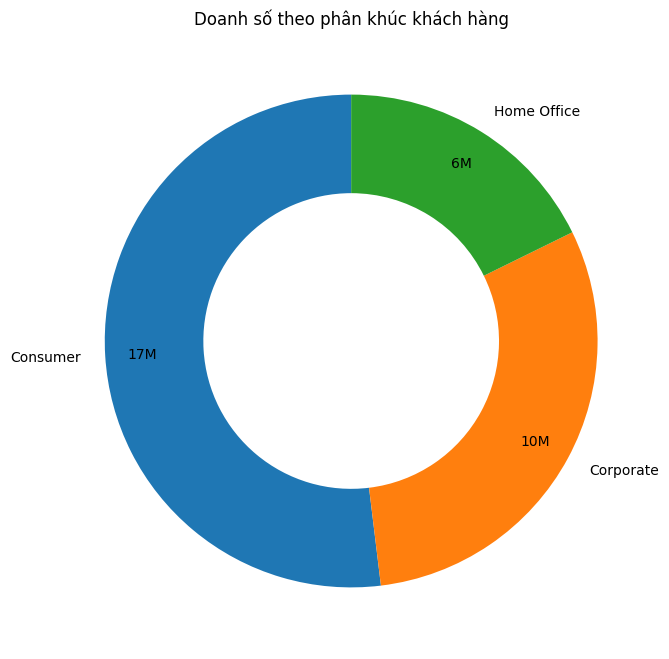

,Customer Segment,Total Sales per Customer
0,Consumer,1.716428e+07
1,Corporate,1.003065e+07
2,Home Office,5.859474e+06


In [78]:
# Import thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt

# Đảm bảo rằng bạn đã đọc dữ liệu từ CSV
# data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# Tính toán tổng doanh thu theo phân khúc khách hàng
sales_per_segment = data.groupby('Customer Segment')['Sales per customer'].sum()

# Vẽ biểu đồ donut
plt.figure(figsize=(10, 8))

# Hàm để hiển thị giá trị làm tròn đến hàng triệu với ký hiệu "M"
def func(pct, allvals):
    absolute = round(pct / 100.*sum(allvals), 2)  # Tính tổng Sales per customer từ phần trăm
    absolute_million = round(absolute / 1_000_000)  # Chuyển đổi thành triệu và làm tròn
    return f'{absolute_million}M'  # Thêm ký hiệu "M"

# Vẽ biểu đồ donut với giá trị làm tròn và thêm ký hiệu "M"
plt.pie(sales_per_segment, labels=sales_per_segment.index, autopct=lambda pct: func(pct, sales_per_segment), 
        startangle=90, wedgeprops=dict(width=0.4), pctdistance=0.85)

# Vẽ tiêu đề
plt.title('Doanh số theo phân khúc khách hàng')

# Hiển thị biểu đồ
plt.show()
# Tính tổng doanh số theo phân khúc khách hàng
sales_per_segment = data.groupby('Customer Segment')['Sales per customer'].sum().reset_index()

# Đổi tên cột cho rõ ràng hơn
sales_per_segment.columns = ['Customer Segment', 'Total Sales per Customer']

# Hiển thị dataframe tổng hợp
sales_per_segment

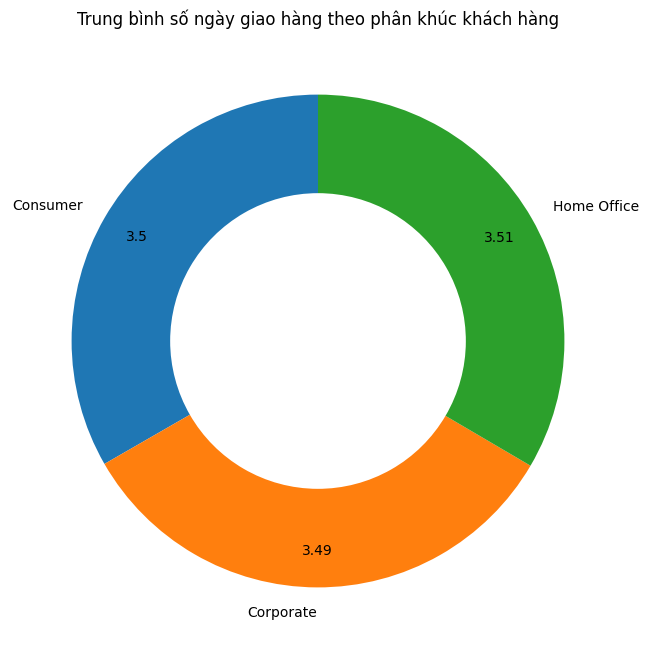

,Customer Segment,Average Days for Shipping (Real)
0,Consumer,3.497508
1,Corporate,3.489788
2,Home Office,3.511450


In [79]:
# Import thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt

# Đảm bảo rằng bạn đã đọc dữ liệu từ CSV
# data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# Tính toán trung bình số ngày giao hàng thực tế theo phân khúc khách hàng
avg_days_per_segment = data.groupby('Customer Segment')['Days for shipping (real)'].mean()

# Vẽ biểu đồ donut
plt.figure(figsize=(10, 8))

# Hàm để hiển thị giá trị trung bình làm tròn đến 2 chữ số thập phân
def func(pct, allvals):
    absolute = round(pct / 100. * sum(allvals), 2)  # Tính tổng Sales per customer từ phần trăm và làm tròn đến 2 chữ số thập phân
    return f'{absolute}'

# Vẽ biểu đồ donut với giá trị trung bình số ngày giao hàng
plt.pie(avg_days_per_segment, labels=avg_days_per_segment.index, autopct=lambda pct: func(pct, avg_days_per_segment), 
        startangle=90, wedgeprops=dict(width=0.4), pctdistance=0.85)

# Vẽ tiêu đề
plt.title('Trung bình số ngày giao hàng theo phân khúc khách hàng')

# Hiển thị biểu đồ
plt.show()
# Tính trung bình số ngày giao hàng thực tế theo phân khúc khách hàng
avg_days_per_segment = data.groupby('Customer Segment')['Days for shipping (real)'].mean().reset_index()

# Đổi tên cột cho rõ ràng hơn
avg_days_per_segment.columns = ['Customer Segment', 'Average Days for Shipping (Real)']

# Hiển thị dataframe tổng hợp
avg_days_per_segment


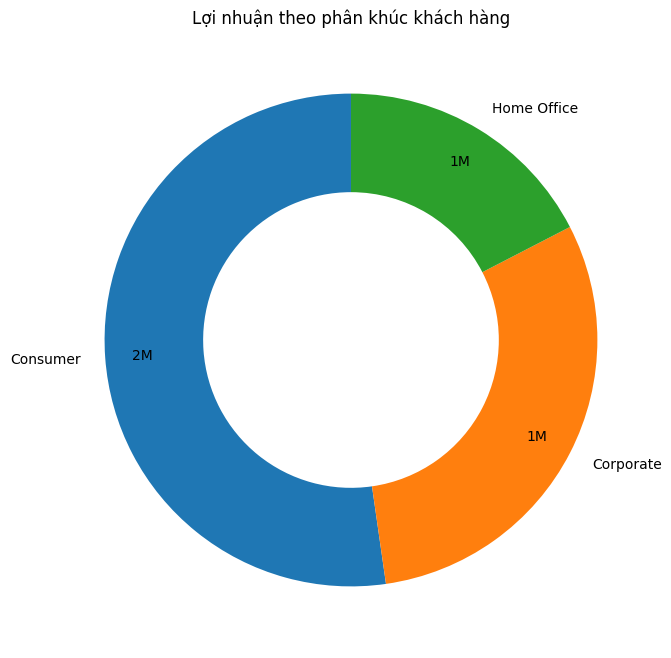

,Customer Segment,Total Profit Per Order
0,Consumer,2.073488e+06
1,Corporate,1.202575e+06
2,Home Office,6.908403e+05


In [80]:
# Import thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt

# Đảm bảo rằng bạn đã đọc dữ liệu từ CSV
# data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# Tính toán tổng lợi nhuận theo phân khúc khách hàng
profit_per_segment = data.groupby('Customer Segment')['Order Profit Per Order'].sum()

# Vẽ biểu đồ donut
plt.figure(figsize=(10, 8))

# Hàm để hiển thị giá trị làm tròn đến 2 chữ số thập phân và thêm ký hiệu "M" (triệu)
def func(pct, allvals):
    absolute = round(pct / 100. * sum(allvals), 2)  # Tính tổng lợi nhuận và làm tròn đến 2 chữ số thập phân
    absolute_million = round(absolute / 1_000_000)  # Chuyển đổi thành triệu và làm tròn
    return f'{absolute_million}M'  # Thêm ký hiệu "M"

# Vẽ biểu đồ donut với giá trị lợi nhuận theo phân khúc
plt.pie(profit_per_segment, labels=profit_per_segment.index, autopct=lambda pct: func(pct, profit_per_segment), 
        startangle=90, wedgeprops=dict(width=0.4), pctdistance=0.85)

# Vẽ tiêu đề
plt.title('Lợi nhuận theo phân khúc khách hàng')

# Hiển thị biểu đồ
plt.show()
# Tính tổng lợi nhuận theo phân khúc khách hàng
profit_per_segment = data.groupby('Customer Segment')['Order Profit Per Order'].sum().reset_index()

# Đổi tên cột cho rõ ràng hơn
profit_per_segment.columns = ['Customer Segment', 'Total Profit Per Order']

# Hiển thị dataframe tổng hợp
profit_per_segment


C:\Users\ACER\AppData\Local\Temp\ipykernel_1548\2578200134.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




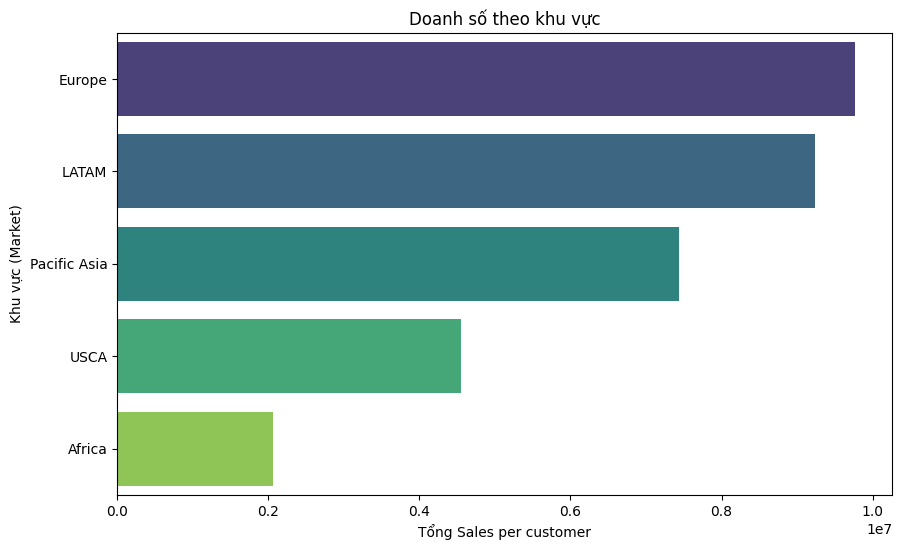

,Market,Total Sales per Customer
1,Europe,9.769198e+06
2,LATAM,9.235762e+06
3,Pacific Asia,7.434263e+06
4,USCA,4.553500e+06
0,Africa,2.061679e+06


In [81]:
# Import thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo rằng bạn đã đọc dữ liệu từ CSV
# data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# Tính tổng doanh số theo khu vực (Market)
sales_by_market = data.groupby('Market')['Sales per customer'].sum().sort_values(ascending=False)

# Vẽ biểu đồ cột ngang (bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_market, y=sales_by_market.index, palette='viridis')

# Thêm tiêu đề và nhãn
plt.title('Doanh số theo khu vực')
plt.xlabel('Tổng Sales per customer')
plt.ylabel('Khu vực (Market)')

# Hiển thị biểu đồ
plt.show()
# Tính tổng doanh số theo khu vực (Market) và sắp xếp giảm dần
sales_by_market = data.groupby('Market')['Sales per customer'].sum().reset_index()

# Đổi tên cột cho rõ ràng hơn
sales_by_market.columns = ['Market', 'Total Sales per Customer']

# Sắp xếp theo tổng doanh số giảm dần
sales_by_market = sales_by_market.sort_values(by='Total Sales per Customer', ascending=False)

# Hiển thị dataframe tổng hợp
sales_by_market


In [82]:
# Import các thư viện cần thiết
import pandas as pd
import plotly.express as px

# Đảm bảo rằng bạn đã đọc dữ liệu từ file CSV
# data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# Tính tổng doanh số theo danh mục sản phẩm (Category Name)
sales_by_category = data.groupby('Category Name')['Order Item Total'].sum().reset_index()

# Vẽ biểu đồ treemap
fig = px.treemap(sales_by_category, 
                 path=['Category Name'],  # Đường dẫn phân cấp (ở đây chỉ có Category Name)
                 values='Order Item Total',  # Dữ liệu tổng doanh số
                 title='Doanh số theo danh mục sản phẩm',  # Tiêu đề
                 color='Order Item Total',  # Màu sắc phản ánh giá trị doanh số
                 color_continuous_scale='YlOrRd')  # Bảng màu từ vàng đến đỏ

# Hiển thị biểu đồ
fig.show()
# Tính tổng doanh số theo danh mục sản phẩm (Category Name)
sales_by_category = data.groupby('Category Name')['Order Item Total'].sum().reset_index()

# Đổi tên cột cho rõ ràng hơn
sales_by_category.columns = ['Category Name', 'Total Order Item Total']

# Hiển thị dataframe tổng hợp
sales_by_category


,Category Name,Total Order Item Total
0,Accessories,1.197125e+05
1,As Seen on TV!,1.851961e+04
2,Baby,1.095740e+04
3,Baseball & Softball,8.436727e+04
4,Basketball,2.470533e+04
5,Books,1.130342e+04
6,Boxing & MMA,7.628672e+04
7,CDs,2.750030e+03
8,Cameras,2.404967e+05
9,Camping & Hiking,3.700784e+06


In [83]:
# Import các thư viện cần thiết
import pandas as pd
import plotly.express as px

# Đảm bảo rằng bạn đã đọc dữ liệu từ file CSV
# data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# Tính tổng doanh số theo quốc gia (Order Country)
sales_by_country = data.groupby('Order Country')['Order Item Total'].sum().reset_index()

# Vẽ bản đồ (map) thể hiện tổng doanh số theo quốc gia
fig = px.choropleth(sales_by_country, 
                    locations='Order Country',  # Quốc gia
                    locationmode='country names',  # Sử dụng tên quốc gia để xác định vị trí
                    color='Order Item Total',  # Màu sắc dựa trên tổng doanh số
                    hover_name='Order Country',  # Hiển thị tên quốc gia khi di chuột
                    color_continuous_scale='YlOrRd',  # Chọn bảng màu
                    title='Doanh số theo quốc gia',  # Tiêu đề biểu đồ
                    labels={'Order Item Total': 'Tổng doanh số'})  # Nhãn cho trục màu

# Cập nhật kích thước biểu đồ và thay đổi kích thước chữ chú thích
fig.update_layout(
    width=1000,  # Kích thước rộng hơn
    height=800,  # Kích thước cao hơn
    hoverlabel=dict(
        font_size=10,  # Kích thước chữ chú thích nhỏ hơn
    ),
    title=dict(
        font_size=20  # Kích thước chữ tiêu đề lớn hơn
    )
)

# Hiển thị biểu đồ
fig.show()
# Tính tổng doanh số theo quốc gia (Order Country)
sales_by_country = data.groupby('Order Country')['Order Item Total'].sum().reset_index()

# Đổi tên cột cho rõ ràng hơn
sales_by_country.columns = ['Order Country', 'Total Order Item Total']

# Hiển thị dataframe tổng hợp
sales_by_country


,Order Country,Total Order Item Total
0,Afganistán,3.565916e+04
1,Albania,7.252600e+03
2,Alemania,1.862578e+06
3,Angola,5.171203e+04
4,Arabia Saudí,1.472882e+05
...,...,...
159,Vietnam,1.494391e+05
160,Yemen,1.184392e+04
161,Yibuti,5.679720e+03
162,Zambia,4.978934e+04


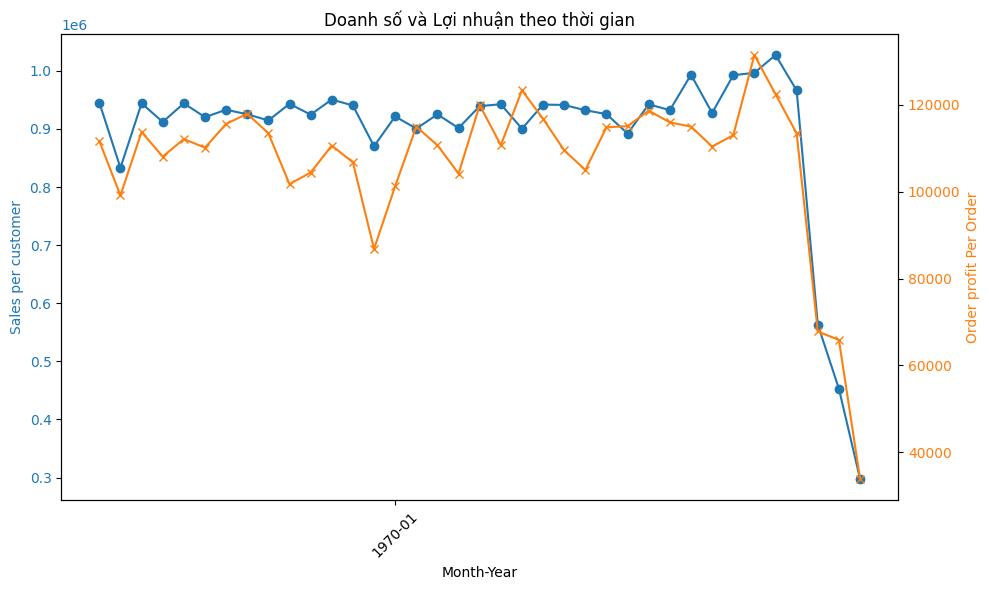

,Year-Month,Total Sales per Customer,Total Order Profit Per Order
0,2015-01,9.453822e+05,111660.740132
1,2015-02,8.330124e+05,99140.660196
2,2015-03,9.440501e+05,113778.210191
3,2015-04,9.120044e+05,108083.679957
4,2015-05,9.439398e+05,112147.900143
5,2015-06,9.202421e+05,110147.160313
6,2015-07,9.329368e+05,115624.059879
7,2015-08,9.251929e+05,117979.770302
8,2015-09,9.145224e+05,113467.940118
9,2015-10,9.431311e+05,101757.870040


In [84]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Đảm bảo rằng bạn đã đọc dữ liệu từ file CSV
# data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# Chuyển đổi cột 'order date (DateOrders)' thành kiểu datetime
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'Year-Month' từ ngày để nhóm theo tháng và năm
data['Year-Month'] = data['order date (DateOrders)'].dt.to_period('M')

# Tính tổng 'Sales per customer' và 'Order profit Per Order' theo tháng
sales_per_month = data.groupby('Year-Month')['Sales per customer'].sum()
profit_per_month = data.groupby('Year-Month')['Order Profit Per Order'].sum()

# Vẽ biểu đồ line chart với hai trục Y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Trục Y chính (Sales per customer)
ax1.plot(sales_per_month.index.astype(str), sales_per_month, color='tab:blue', label='Sales per customer', marker='o')
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Sales per customer', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15))  # Đặt cột X theo tháng
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Định dạng cột X là năm-tháng
plt.xticks(rotation=45)  # Xoay các nhãn trục X cho dễ đọc

# Tạo trục Y phụ cho 'Order Profit Per Order'
ax2 = ax1.twinx()
ax2.plot(profit_per_month.index.astype(str), profit_per_month, color='tab:orange', label='Order profit Per Order', marker='x')
ax2.set_ylabel('Order profit Per Order', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Tiêu đề
plt.title('Doanh số và Lợi nhuận theo thời gian')

# Hiển thị biểu đồ
fig.tight_layout()
plt.show()
# Chuyển đổi cột 'order date (DateOrders)' thành kiểu datetime (nếu chưa thực hiện)
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'Year-Month' để nhóm theo tháng và năm
data['Year-Month'] = data['order date (DateOrders)'].dt.to_period('M')

# Tính tổng doanh số và lợi nhuận theo tháng
monthly_summary = data.groupby('Year-Month').agg({
    'Sales per customer': 'sum',
    'Order Profit Per Order': 'sum'
}).reset_index()

# Đổi tên cột cho rõ ràng hơn
monthly_summary.columns = ['Year-Month', 'Total Sales per Customer', 'Total Order Profit Per Order']

# Hiển thị dataframe tổng hợp
monthly_summary



## Phân tích hiệu suất giao hàng

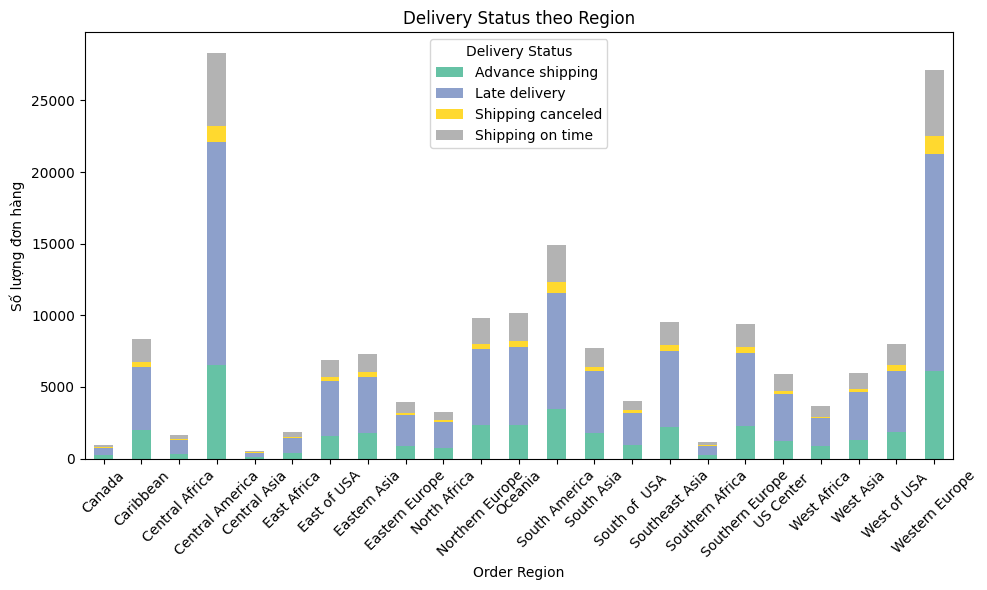

Delivery Status,Advance shipping,Late delivery,Shipping canceled,Shipping on time
Order Region,,,,
Canada,282,468,52,157
Caribbean,1997,4415,367,1539
Central Africa,354,972,61,290
Central America,6566,15518,1167,5090
Central Asia,112,306,11,124
East Africa,399,1036,71,346
East of USA,1560,3849,298,1208
Eastern Asia,1754,3955,307,1264
Eastern Europe,879,2182,135,724


In [85]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo rằng bạn đã đọc dữ liệu từ file CSV
# data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# Tính số lượng đơn hàng theo từng trạng thái giao hàng cho mỗi vùng (Order Region)
count_by_region_status = data.groupby(['Order Region', 'Delivery Status'])['Order Id'].count().unstack()

# Vẽ biểu đồ cột chồng (stacked column chart)
count_by_region_status.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Thêm tiêu đề và nhãn
plt.title('Delivery Status theo Region')
plt.xlabel('Order Region')
plt.ylabel('Số lượng đơn hàng')
plt.xticks(rotation=45)  # Xoay nhãn trục X cho dễ đọc

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
# Tính số lượng đơn hàng theo từng trạng thái giao hàng cho mỗi vùng (Order Region)
count_by_region_status = data.groupby(['Order Region', 'Delivery Status'])['Order Id'].count().unstack().fillna(0)

# Hiển thị dataframe kết quả
count_by_region_status


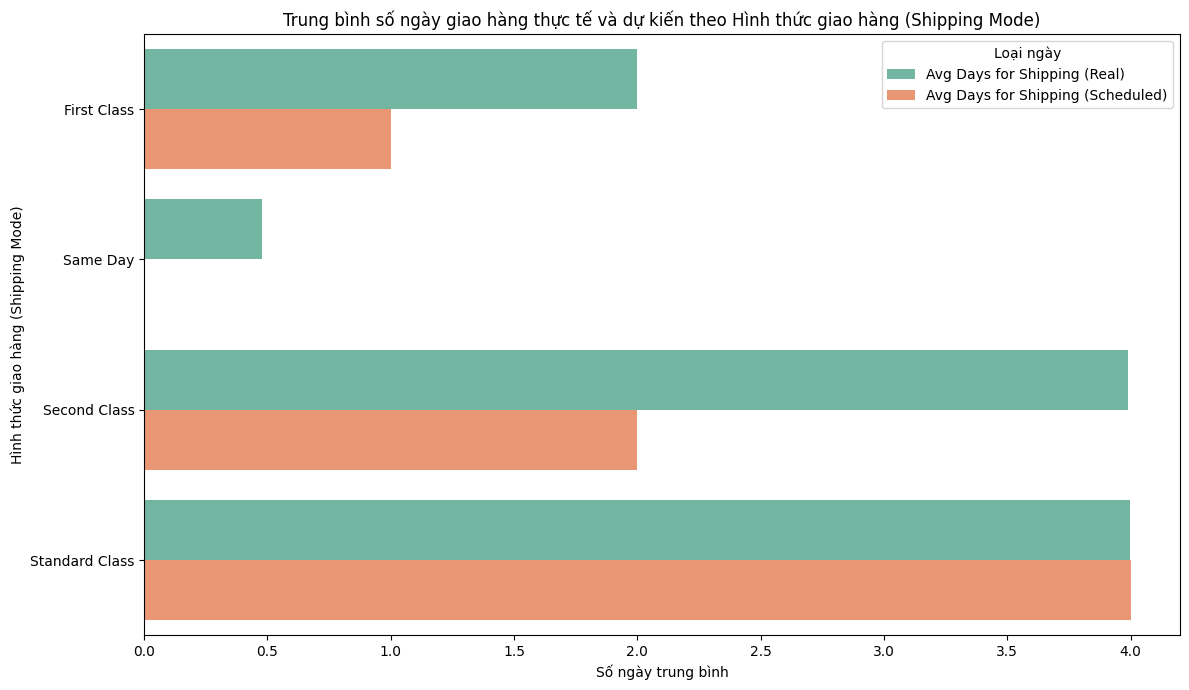

,Shipping Mode,Avg Days for Shipping (Real),Avg Days for Shipping (Scheduled)
0,First Class,2.000000,1.0
1,Same Day,0.478279,0.0
2,Second Class,3.990828,2.0
3,Standard Class,3.995907,4.0


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử data đã được đọc vào biến data

# Tính trung bình Days for shipping (real) và Days for shipment (scheduled) theo Shipping Mode
avg_days = data.groupby('Shipping Mode')[['Days for shipping (real)', 'Days for shipment (scheduled)']].mean().reset_index()

# Đổi tên cột cho dễ hiểu
avg_days.columns = ['Shipping Mode', 'Avg Days for Shipping (Real)', 'Avg Days for Shipping (Scheduled)']

# Vẽ biểu đồ cột ngang (horizontal bar chart) với seaborn
plt.figure(figsize=(12, 7))

# Đổi dữ liệu sang dạng "dài" để seaborn dễ vẽ nhóm
avg_days_melt = avg_days.melt(id_vars='Shipping Mode', var_name='Type', value_name='Average Days')

sns.barplot(data=avg_days_melt, y='Shipping Mode', x='Average Days', hue='Type', palette='Set2')

plt.title('Trung bình số ngày giao hàng thực tế và dự kiến theo Hình thức giao hàng (Shipping Mode)')
plt.xlabel('Số ngày trung bình')
plt.ylabel('Hình thức giao hàng (Shipping Mode)')
plt.legend(title='Loại ngày')

plt.tight_layout()
plt.show()
# Tính trung bình Days for shipping (real) và Days for shipment (scheduled) theo Shipping Mode
avg_days = data.groupby('Shipping Mode')[['Days for shipping (real)', 'Days for shipment (scheduled)']].mean().reset_index()

# Đổi tên cột cho rõ ràng hơn
avg_days.columns = ['Shipping Mode', 'Avg Days for Shipping (Real)', 'Avg Days for Shipping (Scheduled)']

# Hiển thị dataframe tổng hợp
avg_days

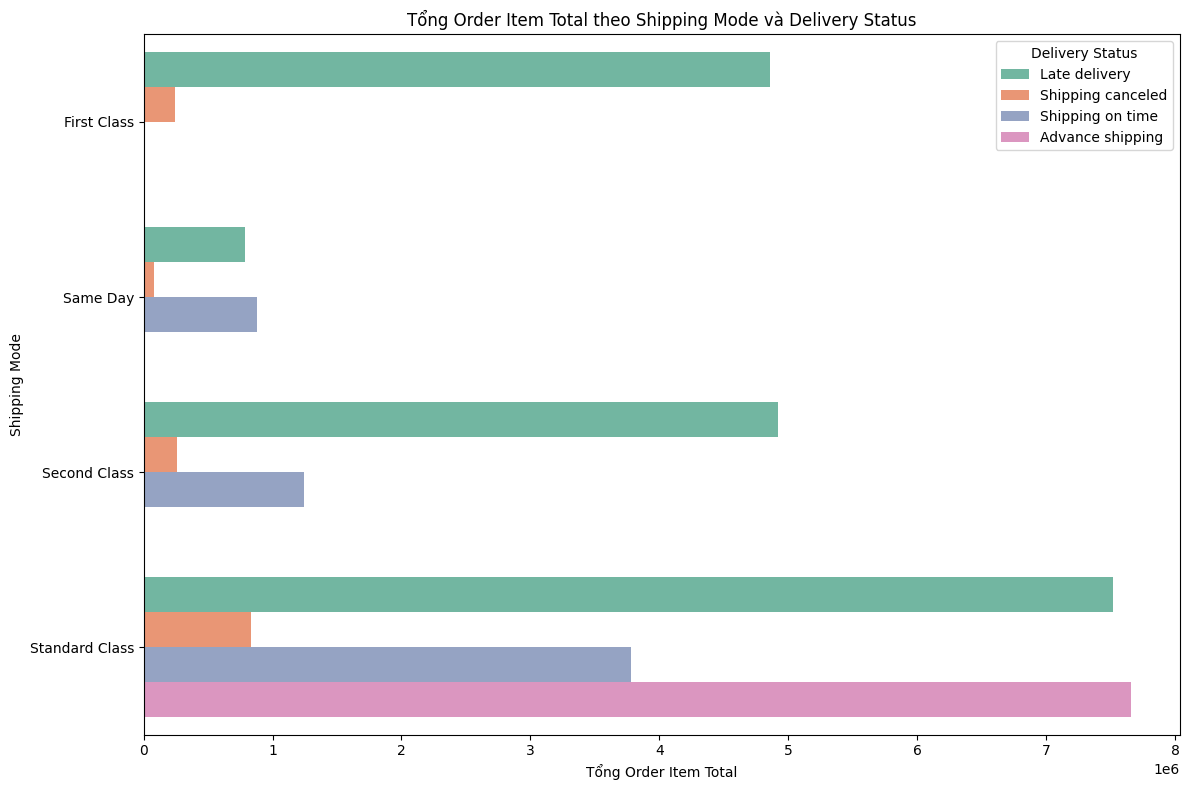

,Shipping Mode,Delivery Status,Total Order,Shipping Mode Rate
0,First Class,Late delivery,4.860950e+06,0.952674
1,First Class,Shipping canceled,2.395013e+05,0.047326
2,Same Day,Late delivery,7.872367e+05,0.461495
3,Same Day,Shipping canceled,7.849076e+04,0.045926
4,Same Day,Shipping on time,8.794740e+05,0.492579
5,Second Class,Late delivery,4.918063e+06,0.767178
6,Second Class,Shipping canceled,2.558976e+05,0.040851
7,Second Class,Shipping on time,1.242568e+06,0.191971
8,Standard Class,Advance shipping,7.656339e+06,0.384676
9,Standard Class,Late delivery,7.516306e+06,0.381319


In [87]:
import pandas as pd
import numpy as np

# Đếm số Order Id duy nhất theo Shipping Mode và Delivery Status
count_by_mode_status = data.groupby(['Shipping Mode', 'Delivery Status'])['Order Id'].nunique().reset_index(name='Count_Mode_Status')

# Đếm số Order Id duy nhất theo Shipping Mode
count_by_mode = data.groupby('Shipping Mode')['Order Id'].nunique().reset_index(name='Count_Mode')

# Gộp 2 bảng để tính tỷ lệ
df_rate = count_by_mode_status.merge(count_by_mode, on='Shipping Mode')

# Tính Shipping Mode Rate
df_rate['Shipping Mode Rate'] = df_rate['Count_Mode_Status'] / df_rate['Count_Mode']
# Tổng Order Item Total theo Shipping Mode và Delivery Status
total_order = data.groupby(['Shipping Mode', 'Delivery Status'])['Order Item Total'].sum().reset_index(name='Total Order')

# Gộp với tỷ lệ để có dữ liệu đầy đủ
df_final = total_order.merge(df_rate[['Shipping Mode', 'Delivery Status', 'Shipping Mode Rate']], on=['Shipping Mode', 'Delivery Status'])
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.barplot(
    data=df_final,
    x='Total Order',
    y='Shipping Mode',
    hue='Delivery Status',
    palette='Set2'
)

plt.title('Tổng Order Item Total theo Shipping Mode và Delivery Status')
plt.xlabel('Tổng Order Item Total')
plt.ylabel('Shipping Mode')
plt.legend(title='Delivery Status')

plt.tight_layout()
plt.show()
# Đếm số Order Id duy nhất theo Shipping Mode và Delivery Status
count_by_mode_status = data.groupby(['Shipping Mode', 'Delivery Status'])['Order Id'].nunique().reset_index(name='Count_Mode_Status')

# Đếm số Order Id duy nhất theo Shipping Mode
count_by_mode = data.groupby('Shipping Mode')['Order Id'].nunique().reset_index(name='Count_Mode')

# Gộp 2 bảng để tính tỷ lệ
df_rate = count_by_mode_status.merge(count_by_mode, on='Shipping Mode')

# Tính Shipping Mode Rate
df_rate['Shipping Mode Rate'] = df_rate['Count_Mode_Status'] / df_rate['Count_Mode']

# Tổng Order Item Total theo Shipping Mode và Delivery Status
total_order = data.groupby(['Shipping Mode', 'Delivery Status'])['Order Item Total'].sum().reset_index(name='Total Order')

# Gộp với tỷ lệ để có dữ liệu đầy đủ
df_final = total_order.merge(df_rate[['Shipping Mode', 'Delivery Status', 'Shipping Mode Rate']], on=['Shipping Mode', 'Delivery Status'])

# Hiển thị dataframe
df_final


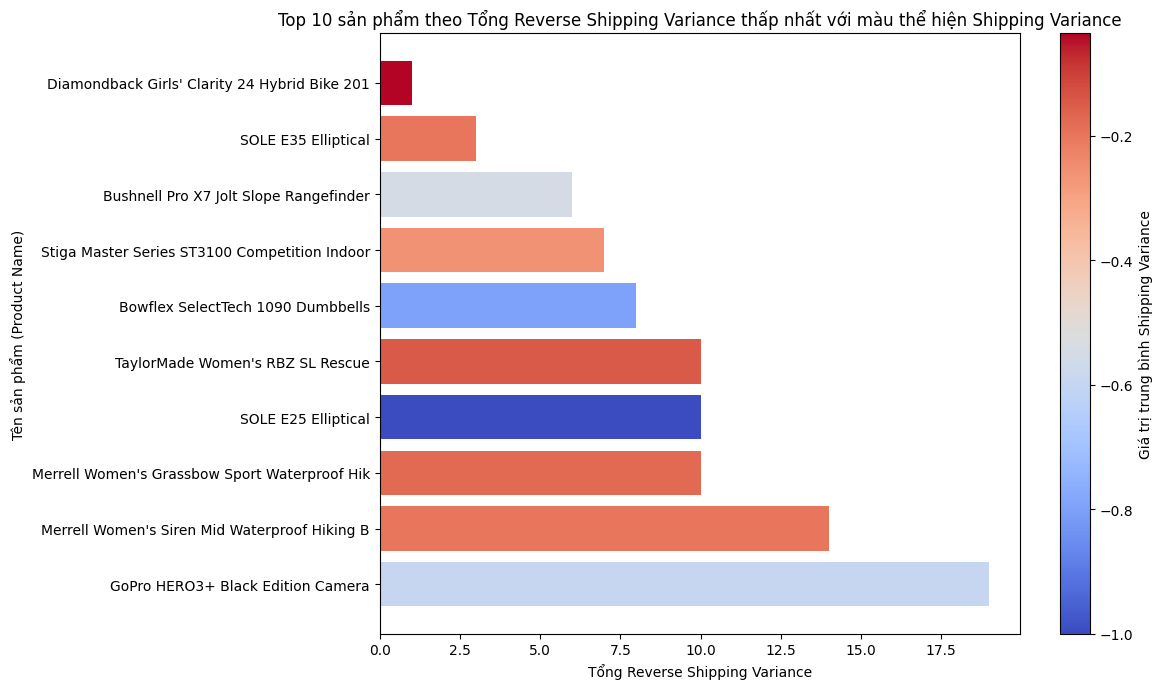

,Product Name,Reverse Shipping Variance,Shipping Variance
0,Diamondback Girls' Clarity 24 Hybrid Bike 201,1,-0.035714
1,SOLE E35 Elliptical,3,-0.200000
2,Bushnell Pro X7 Jolt Slope Rangefinder,6,-0.545455
3,Stiga Master Series ST3100 Competition Indoor,7,-0.259259
4,Bowflex SelectTech 1090 Dumbbells,8,-0.800000
5,TaylorMade Women's RBZ SL Rescue,10,-0.147059
6,SOLE E25 Elliptical,10,-1.000000
7,Merrell Women's Grassbow Sport Waterproof Hik,10,-0.172414
8,Merrell Women's Siren Mid Waterproof Hiking B,14,-0.200000
9,GoPro HERO3+ Black Edition Camera,19,-0.593750


In [88]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Tạo biến Shipping Variance và Reverse Shipping Variance
data['Shipping Variance'] = data['Days for shipment (scheduled)'] - data['Days for shipping (real)']
data['Reverse Shipping Variance'] = -data['Shipping Variance']

# 2. Tính tổng Reverse Shipping Variance theo Product Name
reverse_variance_sum = data.groupby('Product Name')['Reverse Shipping Variance'].sum().reset_index()

# 3. Lấy top 10 sản phẩm có tổng Reverse Shipping Variance thấp nhất (giá trị nhỏ nhất)
top10_reverse_variance = reverse_variance_sum.sort_values(by='Reverse Shipping Variance', ascending=True).head(10)

# 4. Tính trung bình Shipping Variance theo Product Name, lọc top 10
shipping_variance_mean = data.groupby('Product Name')['Shipping Variance'].mean().reset_index()
shipping_variance_mean_top10 = shipping_variance_mean[shipping_variance_mean['Product Name'].isin(top10_reverse_variance['Product Name'])]

# 5. Gộp dữ liệu để vẽ
plot_data = top10_reverse_variance.merge(shipping_variance_mean_top10, on='Product Name')

# 6. Vẽ biểu đồ cột ngang với màu theo Shipping Variance trung bình
fig, ax = plt.subplots(figsize=(12, 7))

norm = plt.Normalize(plot_data['Shipping Variance'].min(), plot_data['Shipping Variance'].max())
colors = plt.cm.coolwarm(norm(plot_data['Shipping Variance']))

bars = ax.barh(plot_data['Product Name'], plot_data['Reverse Shipping Variance'], color=colors)

ax.set_xlabel('Tổng Reverse Shipping Variance')
ax.set_ylabel('Tên sản phẩm (Product Name)')
ax.set_title('Top 10 sản phẩm theo Tổng Reverse Shipping Variance thấp nhất với màu thể hiện Shipping Variance')

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Giá trị trung bình Shipping Variance')

ax.invert_yaxis()
plt.tight_layout()
plt.show()
# Tạo biến Shipping Variance và Reverse Shipping Variance
data['Shipping Variance'] = data['Days for shipment (scheduled)'] - data['Days for shipping (real)']
data['Reverse Shipping Variance'] = -data['Shipping Variance']

# Tính tổng Reverse Shipping Variance theo Product Name
reverse_variance_sum = data.groupby('Product Name')['Reverse Shipping Variance'].sum().reset_index()

# Lấy top 10 sản phẩm theo tổng Reverse Shipping Variance thấp nhất
top10_reverse_variance = reverse_variance_sum.sort_values(by='Reverse Shipping Variance', ascending=True).head(10)

# Tính trung bình Shipping Variance theo Product Name, lọc top 10
shipping_variance_mean = data.groupby('Product Name')['Shipping Variance'].mean().reset_index()
shipping_variance_mean_top10 = shipping_variance_mean[shipping_variance_mean['Product Name'].isin(top10_reverse_variance['Product Name'])]

# Gộp dữ liệu để vẽ và hiển thị
plot_data = top10_reverse_variance.merge(shipping_variance_mean_top10, on='Product Name')

# Hiển thị dataframe kết quả
plot_data


In [89]:
import pandas as pd
import plotly.express as px

# 1. Tạo biến Late Delivery Rate (country)
late_delivery_count = data[data['Delivery Status'] == 'Late delivery'] \
    .groupby('Order Country')['Order Id'].nunique().reset_index(name='Late Delivery Count')

total_order_count = data.groupby('Order Country')['Order Id'].nunique().reset_index(name='Total Order Count')

late_delivery_rate = late_delivery_count.merge(total_order_count, on='Order Country')
late_delivery_rate['Late Delivery Rate'] = late_delivery_rate['Late Delivery Count'] / late_delivery_rate['Total Order Count']

# 2. Tính trung bình Days for shipping (real) theo quốc gia
avg_days_shipping = data.groupby('Order Country')['Days for shipping (real)'].mean().reset_index(name='Avg Days for Shipping (Real)')

# 3. Gộp dữ liệu
map_data = late_delivery_rate.merge(avg_days_shipping, on='Order Country')

# 4. Vẽ bản đồ choropleth với Plotly
fig = px.choropleth(
    map_data,
    locations='Order Country',
    locationmode='country names',
    color='Late Delivery Rate',
    hover_name='Order Country',
    hover_data={
        'Late Delivery Rate': ':.2%',
        'Avg Days for Shipping (Real)': ':.2f'
    },
    color_continuous_scale='Reds',
    title='Tỷ lệ giao hàng trễ và thời gian giao hàng trung bình theo quốc gia',
    labels={'Late Delivery Rate': 'Tỷ lệ giao hàng trễ', 'Avg Days for Shipping (Real)': 'Trung bình ngày giao hàng'}
)

fig.show()
# Tạo biến Late Delivery Rate (country)
late_delivery_count = data[data['Delivery Status'] == 'Late delivery'] \
    .groupby('Order Country')['Order Id'].nunique().reset_index(name='Late Delivery Count')

total_order_count = data.groupby('Order Country')['Order Id'].nunique().reset_index(name='Total Order Count')

late_delivery_rate = late_delivery_count.merge(total_order_count, on='Order Country')
late_delivery_rate['Late Delivery Rate'] = late_delivery_rate['Late Delivery Count'] / late_delivery_rate['Total Order Count']

# Tính trung bình Days for shipping (real) theo quốc gia
avg_days_shipping = data.groupby('Order Country')['Days for shipping (real)'].mean().reset_index(name='Avg Days for Shipping (Real)')

# Gộp dữ liệu
map_data = late_delivery_rate.merge(avg_days_shipping, on='Order Country')

# Hiển thị dataframe kết quả
map_data


,Order Country,Late Delivery Count,Total Order Count,Late Delivery Rate,Avg Days for Shipping (Real)
0,Afganistán,41,73,0.561644,3.478528
1,Albania,7,13,0.538462,2.459459
2,Alemania,1966,3518,0.558840,3.519239
3,Angola,62,103,0.601942,3.401961
4,Arabia Saudí,171,301,0.568106,3.532558
...,...,...,...,...,...
152,Vietnam,182,335,0.543284,3.579921
153,Yemen,18,27,0.666667,3.661972
154,Yibuti,6,10,0.600000,4.387097
155,Zambia,49,86,0.569767,3.823308


## Doanh thu theo thời gian của thị trường

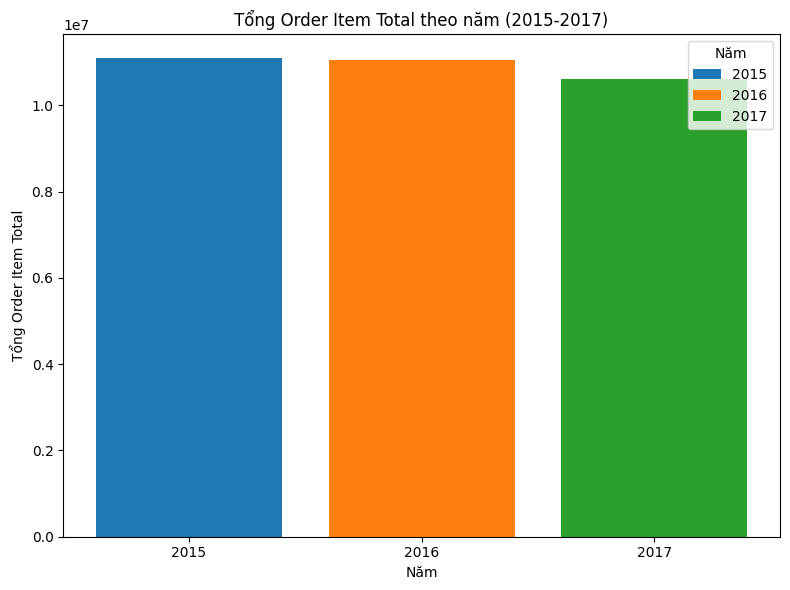

,Year,Order Item Total
0,2015,1.108954e+07
1,2016,1.105600e+07
2,2017,1.061091e+07


In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi cột 'order date (DateOrders)' sang kiểu datetime nếu chưa làm
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'Year' lấy năm từ 'order date (DateOrders)'
data['Year'] = data['order date (DateOrders)'].dt.year

# Lọc dữ liệu chỉ lấy năm từ 2015 đến 2017
filtered_data = data[(data['Year'] >= 2015) & (data['Year'] <= 2017)]

# Tính tổng Order Item Total theo năm trong khoảng lọc
total_order_per_year = filtered_data.groupby('Year')['Order Item Total'].sum().reset_index()

# Vẽ biểu đồ cột với màu khác nhau cho từng năm và legend
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Màu cho 3 năm

plt.figure(figsize=(8, 6))
bars = plt.bar(total_order_per_year['Year'].astype(str), total_order_per_year['Order Item Total'], color=colors)

plt.xlabel('Năm')
plt.ylabel('Tổng Order Item Total')
plt.title('Tổng Order Item Total theo năm (2015-2017)')
plt.xticks(rotation=0)

# Tạo legend thủ công theo màu và năm
plt.legend(bars, total_order_per_year['Year'].astype(str), title='Năm')

plt.tight_layout()
plt.show()
# Chuyển đổi cột 'order date (DateOrders)' sang kiểu datetime nếu chưa làm
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'Year' lấy năm từ 'order date (DateOrders)'
data['Year'] = data['order date (DateOrders)'].dt.year

# Lọc dữ liệu chỉ lấy năm từ 2015 đến 2017
filtered_data = data[(data['Year'] >= 2015) & (data['Year'] <= 2017)]

# Tính tổng Order Item Total theo năm trong khoảng lọc
total_order_per_year = filtered_data.groupby('Year')['Order Item Total'].sum().reset_index()

# Hiển thị dataframe kết quả
total_order_per_year


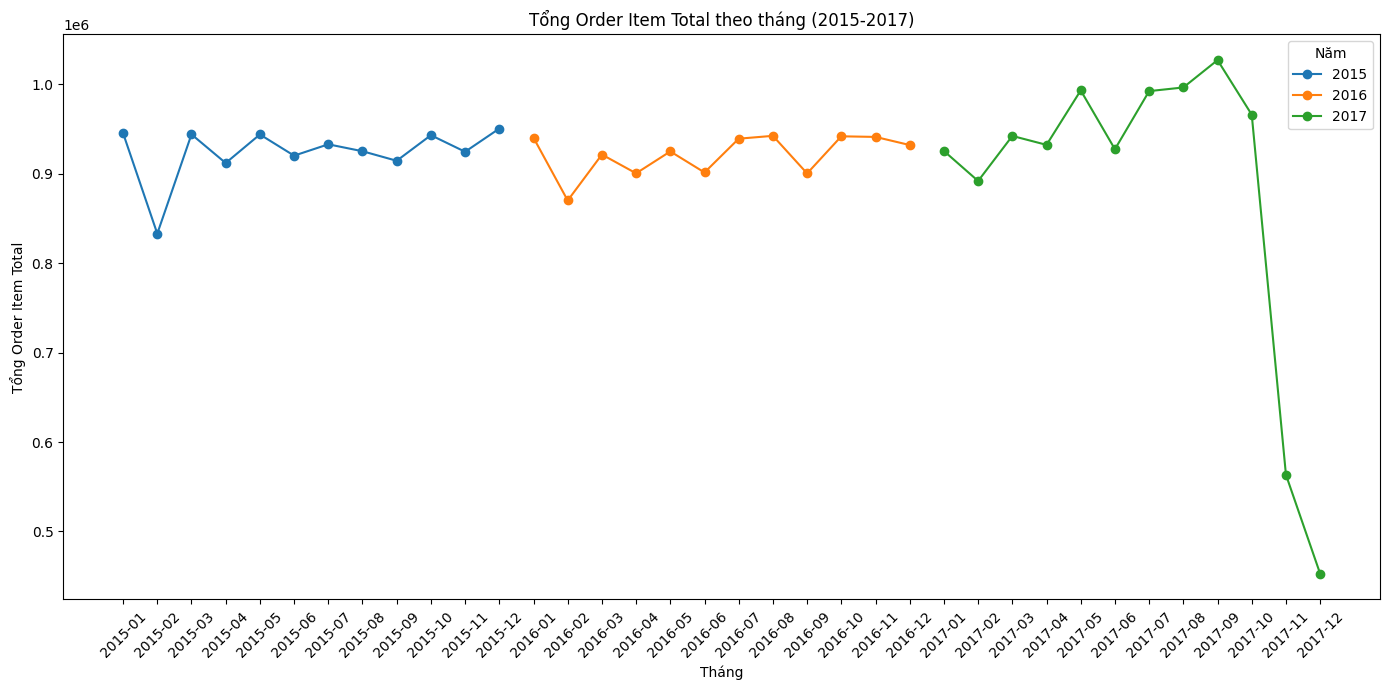

,Year,Year-Month,Order Item Total
0,2015,2015-01,9.453822e+05
1,2015,2015-02,8.330124e+05
2,2015,2015-03,9.440501e+05
3,2015,2015-04,9.120044e+05
4,2015,2015-05,9.439398e+05
5,2015,2015-06,9.202421e+05
6,2015,2015-07,9.329368e+05
7,2015,2015-08,9.251929e+05
8,2015,2015-09,9.145224e+05
9,2015,2015-10,9.431311e+05


In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi cột 'order date (DateOrders)' sang kiểu datetime nếu chưa làm
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'Year' và 'Year-Month' để nhóm theo tháng và năm
data['Year'] = data['order date (DateOrders)'].dt.year
data['Year-Month'] = data['order date (DateOrders)'].dt.to_period('M')

# Lọc dữ liệu chỉ lấy năm từ 2015 đến 2017
filtered_data = data[(data['Year'] >= 2015) & (data['Year'] <= 2017)]

# Tính tổng Order Item Total theo Year-Month và Year
monthly_sales = filtered_data.groupby(['Year', 'Year-Month'])['Order Item Total'].sum().reset_index()

# Chuyển 'Year-Month' về dạng chuỗi để vẽ
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)

# Vẽ line chart với legend theo năm
plt.figure(figsize=(14, 7))

for year in monthly_sales['Year'].unique():
    subset = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(subset['Year-Month'], subset['Order Item Total'], marker='o', label=str(year))

plt.xlabel('Tháng')
plt.ylabel('Tổng Order Item Total')
plt.title('Tổng Order Item Total theo tháng (2015-2017)')
plt.xticks(rotation=45)
plt.legend(title='Năm')
plt.tight_layout()
plt.show()
# Chuyển đổi cột 'order date (DateOrders)' sang kiểu datetime nếu chưa làm
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'Year' và 'Month' lấy năm và tháng từ 'order date (DateOrders)'
data['Year'] = data['order date (DateOrders)'].dt.year
data['Month'] = data['order date (DateOrders)'].dt.month

# Tạo cột 'Year-Month' để nhóm theo tháng của từng năm, định dạng chuỗi dễ vẽ
data['Year-Month'] = data['order date (DateOrders)'].dt.to_period('M').astype(str)

# Tính tổng Order Item Total theo Year-Month và Year (để vẽ legend theo năm)
monthly_sales = data.groupby(['Year', 'Year-Month'])['Order Item Total'].sum().reset_index()

# Hiển thị dataframe kết quả
monthly_sales


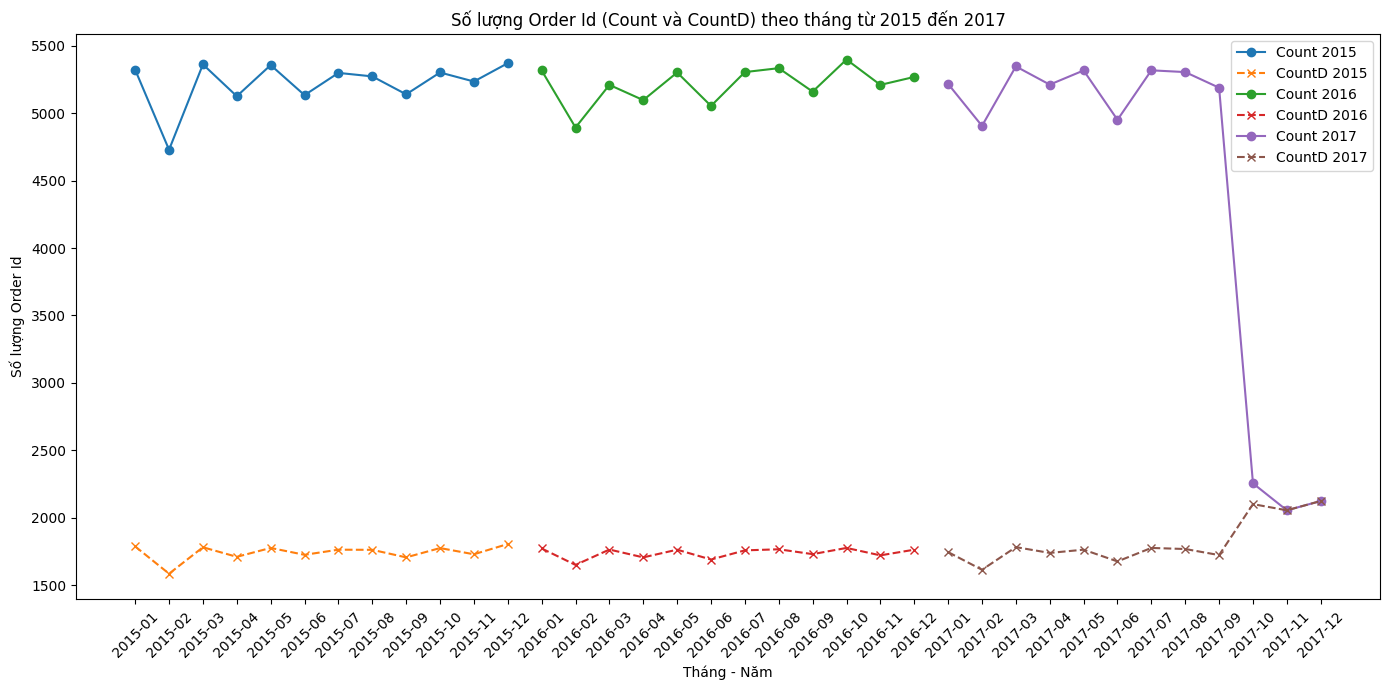

,Year,Year-Month,Count,CountD
0,2015,2015-01,5322,1787
1,2015,2015-02,4729,1585
2,2015,2015-03,5362,1781
3,2015,2015-04,5126,1710
4,2015,2015-05,5357,1776
5,2015,2015-06,5134,1725
6,2015,2015-07,5299,1763
7,2015,2015-08,5273,1762
8,2015,2015-09,5140,1706
9,2015,2015-10,5302,1775


In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi cột 'order date (DateOrders)' sang datetime nếu chưa làm
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'Year' và 'Year-Month' (tháng-năm dạng chuỗi)
data['Year'] = data['order date (DateOrders)'].dt.year
data['Year-Month'] = data['order date (DateOrders)'].dt.to_period('M').astype(str)

# Lọc dữ liệu chỉ lấy năm 2015 đến 2017
filtered_data = data[(data['Year'] >= 2015) & (data['Year'] <= 2017)]

# Tính tổng count (số dòng) và count distinct (số Order Id duy nhất) theo Year và Year-Month
agg_data = filtered_data.groupby(['Year', 'Year-Month']).agg(
    Count=('Order Id', 'count'),
    CountD=('Order Id', 'nunique')
).reset_index()

# Vẽ line chart với 2 giá trị, legend theo năm và từng biến
plt.figure(figsize=(14, 7))

years = agg_data['Year'].unique()

for year in years:
    subset = agg_data[agg_data['Year'] == year]
    plt.plot(subset['Year-Month'], subset['Count'], marker='o', label=f'Count {year}')
    plt.plot(subset['Year-Month'], subset['CountD'], marker='x', linestyle='--', label=f'CountD {year}')

plt.xlabel('Tháng - Năm')
plt.ylabel('Số lượng Order Id')
plt.title('Số lượng Order Id (Count và CountD) theo tháng từ 2015 đến 2017')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# Chuyển đổi cột 'order date (DateOrders)' sang datetime nếu chưa làm
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'Year' và 'Year-Month' (tháng-năm dạng chuỗi)
data['Year'] = data['order date (DateOrders)'].dt.year
data['Year-Month'] = data['order date (DateOrders)'].dt.to_period('M').astype(str)

# Lọc dữ liệu chỉ lấy năm 2015 đến 2017
filtered_data = data[(data['Year'] >= 2015) & (data['Year'] <= 2017)]

# Tính tổng count và count distinct theo Year và Year-Month
agg_data = filtered_data.groupby(['Year', 'Year-Month']).agg(
    Count=('Order Id', 'count'),
    CountD=('Order Id', 'nunique')
).reset_index()

# Hiển thị dataframe kết quả
agg_data


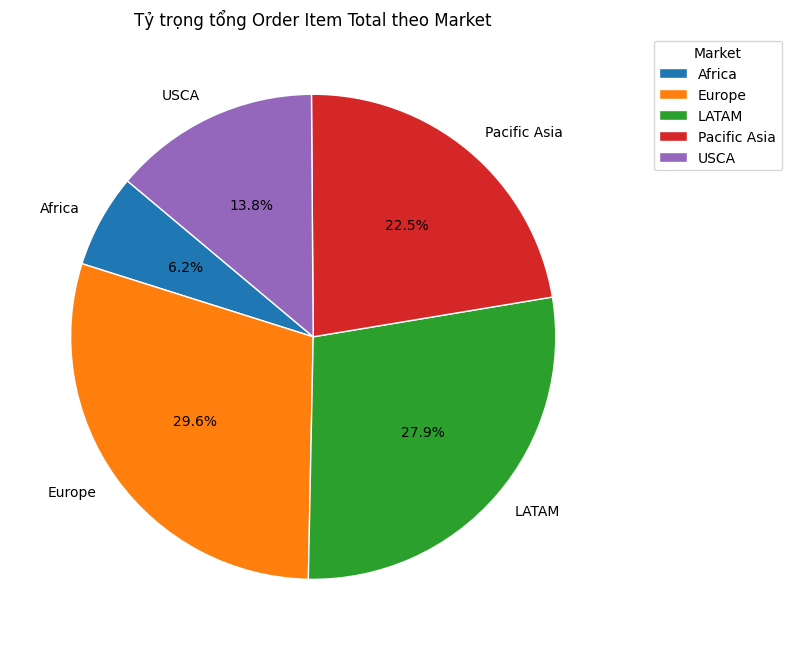

In [93]:
import matplotlib.pyplot as plt

# Tính tổng Order Item Total theo Market
total_order_by_market = data.groupby('Market')['Order Item Total'].sum()

# Vẽ pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    total_order_by_market,
    labels=total_order_by_market.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(edgecolor='w')
)

plt.title('Tỷ trọng tổng Order Item Total theo Market')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [94]:
total_order_by_market = data.groupby('Market')['Order Item Total'].sum().reset_index(name='Total Order Item Total')

total_order_by_market


,Market,Total Order Item Total
0,Africa,2.061679e+06
1,Europe,9.769198e+06
2,LATAM,9.235762e+06
3,Pacific Asia,7.434263e+06
4,USCA,4.553500e+06


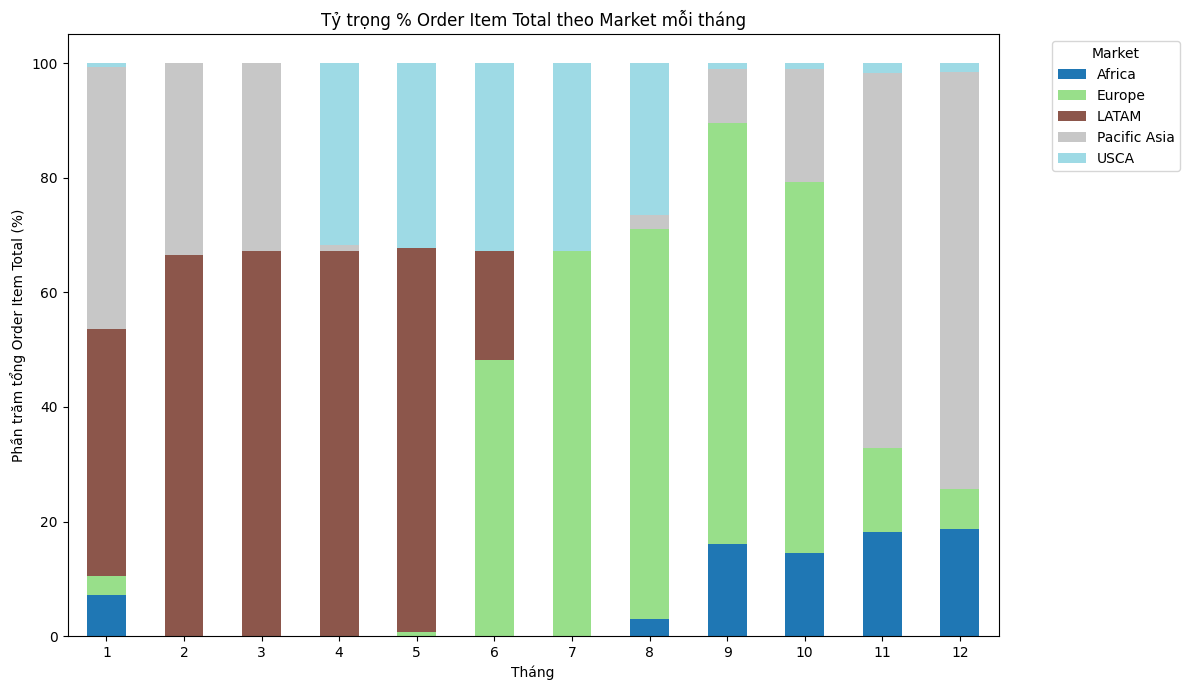

Market,Month,Africa,Europe,LATAM,Pacific Asia,USCA
0,1,7.199481,3.293287,43.112925,45.734486,0.659820
1,2,0.000000,0.000000,66.470180,33.529820,0.000000
2,3,0.000000,0.000000,67.181478,32.818522,0.000000
3,4,0.000000,0.000000,67.192953,1.046942,31.760105
4,5,0.000000,0.706864,66.975163,0.000000,32.317973
5,6,0.000000,48.191619,19.018151,0.000000,32.790229
6,7,0.000000,67.212732,0.000000,0.000000,32.787268
7,8,3.037327,67.947984,0.000000,2.575544,26.439144
8,9,16.042727,73.508782,0.000000,9.403608,1.044882
9,10,14.576039,64.633347,0.000000,19.783267,1.007348


In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển cột 'order date (DateOrders)' sang datetime nếu chưa làm
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'Month' lấy số tháng từ cột ngày
data['Month'] = data['order date (DateOrders)'].dt.month

# Tính tổng Order Item Total theo Month và Market
monthly_market_sales = data.groupby(['Month', 'Market'])['Order Item Total'].sum().unstack(fill_value=0)

# Chuẩn hóa để mỗi tháng tổng = 100%
monthly_market_percent = monthly_market_sales.div(monthly_market_sales.sum(axis=1), axis=0) * 100

# Vẽ stacked 100% column chart
monthly_market_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='tab20'
)

plt.ylabel('Phần trăm tổng Order Item Total (%)')
plt.xlabel('Tháng')
plt.title('Tỷ trọng % Order Item Total theo Market mỗi tháng')
plt.xticks(rotation=0)
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Chuyển cột 'order date (DateOrders)' sang datetime nếu chưa làm
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'Month' lấy số tháng
data['Month'] = data['order date (DateOrders)'].dt.month

# Tính tổng Order Item Total theo Month và Market
monthly_market_sales = data.groupby(['Month', 'Market'])['Order Item Total'].sum().unstack(fill_value=0)

# Chuẩn hóa để mỗi tháng tổng = 100%
monthly_market_percent = monthly_market_sales.div(monthly_market_sales.sum(axis=1), axis=0) * 100

# Hiển thị dataframe dữ liệu
monthly_market_percent.reset_index()


## Phân tích doanh thu và lợi nhuận chi phí về PKKH

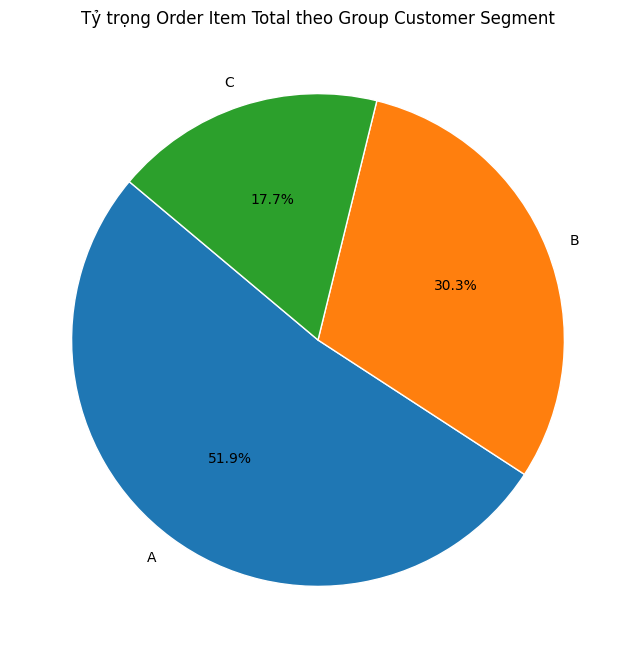

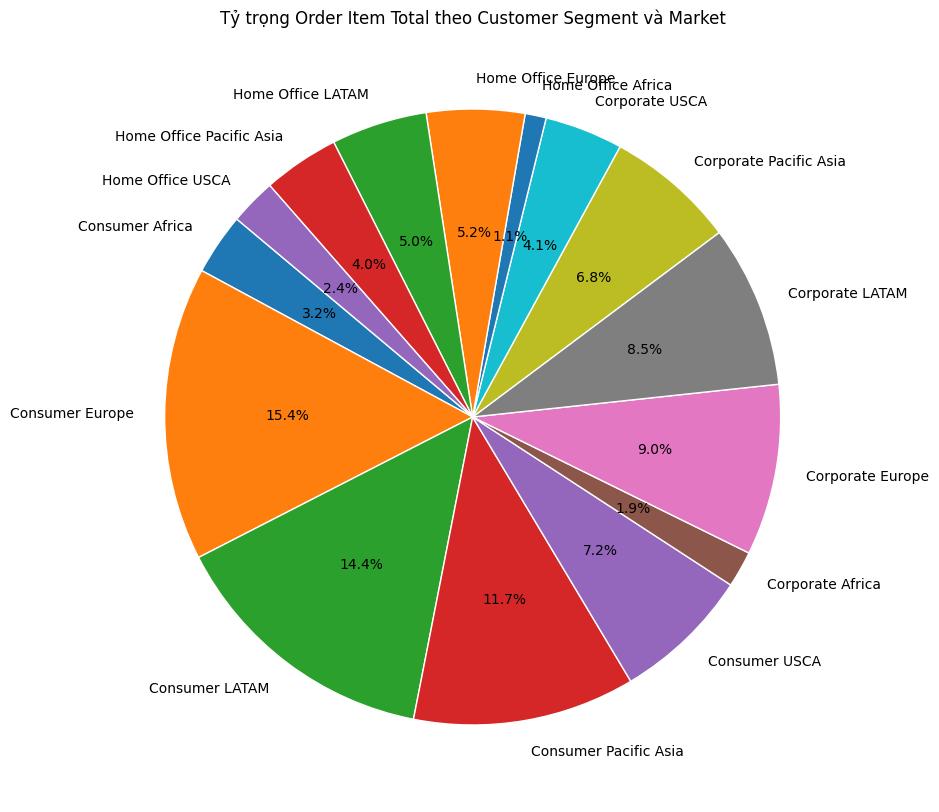

,Group Name,Total Order Item,Group Type
0,A,1.716428e+07,Group Customer Segment
1,B,1.003065e+07,Group Customer Segment
2,C,5.859474e+06,Group Customer Segment
3,Consumer Africa,1.066810e+06,Customer Segment và Market
4,Consumer Europe,5.097709e+06,Customer Segment và Market
5,Consumer LATAM,4.754728e+06,Customer Segment và Market
6,Consumer Pacific Asia,3.853807e+06,Customer Segment và Market
7,Consumer USCA,2.391223e+06,Customer Segment và Market
8,Corporate Africa,6.292639e+05,Customer Segment và Market
9,Corporate Europe,2.968304e+06,Customer Segment và Market


In [96]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Tạo biến customer segment mã theo điều kiện
def map_customer_segment(seg):
    if seg == 'Consumer':
        return 'A-Consumer'
    elif seg == 'Corporate':
        return 'B-Corporate'
    elif seg == 'Home Office':
        return 'C-Home Office'
    else:
        return 'Other'

data['customer segment mã'] = data['Customer Segment'].apply(map_customer_segment)

# 2. Tạo Group Customer Segment bằng cách lấy ký tự đầu tiên
data['Group Customer Segment'] = data['customer segment mã'].str[0]

# 3. Tạo biến Customer segment và Market (nối 2 cột)
data['Customer segment và Market'] = data['Customer Segment'] + ' ' + data['Market']

# 4. Tổng Order Item Total theo Group Customer Segment
group_sum = data.groupby('Group Customer Segment')['Order Item Total'].sum()

# Vẽ pie chart cho Group Customer Segment
plt.figure(figsize=(8, 8))
plt.pie(
    group_sum,
    labels=group_sum.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(edgecolor='w')
)
plt.title('Tỷ trọng Order Item Total theo Group Customer Segment')
plt.show()

# 5. Tổng Order Item Total theo Customer segment và Market
segment_market_sum = data.groupby('Customer segment và Market')['Order Item Total'].sum()

# Vẽ pie chart cho Customer segment và Market
plt.figure(figsize=(10, 10))
plt.pie(
    segment_market_sum,
    labels=segment_market_sum.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(edgecolor='w')
)
plt.title('Tỷ trọng Order Item Total theo Customer Segment và Market')
plt.show()
# Chuyển đổi tổng Order Item Total theo Group Customer Segment thành dataframe và thêm cột phân loại
df_group_sum = group_sum.reset_index().rename(columns={'Order Item Total': 'Total Order Item'})
df_group_sum['Group Type'] = 'Group Customer Segment'

# Chuyển đổi tổng Order Item Total theo Customer segment và Market thành dataframe và thêm cột phân loại
df_segment_market_sum = segment_market_sum.reset_index().rename(columns={'Order Item Total': 'Total Order Item'})
df_segment_market_sum['Group Type'] = 'Customer Segment và Market'

# Đổi tên cột để chuẩn hóa trước khi gộp
df_group_sum = df_group_sum.rename(columns={'Group Customer Segment': 'Group Name'})
df_segment_market_sum = df_segment_market_sum.rename(columns={'Customer segment và Market': 'Group Name'})

# Gộp hai dataframe
df_combined = pd.concat([df_group_sum, df_segment_market_sum], ignore_index=True)

# Hiển thị dataframe gộp
df_combined



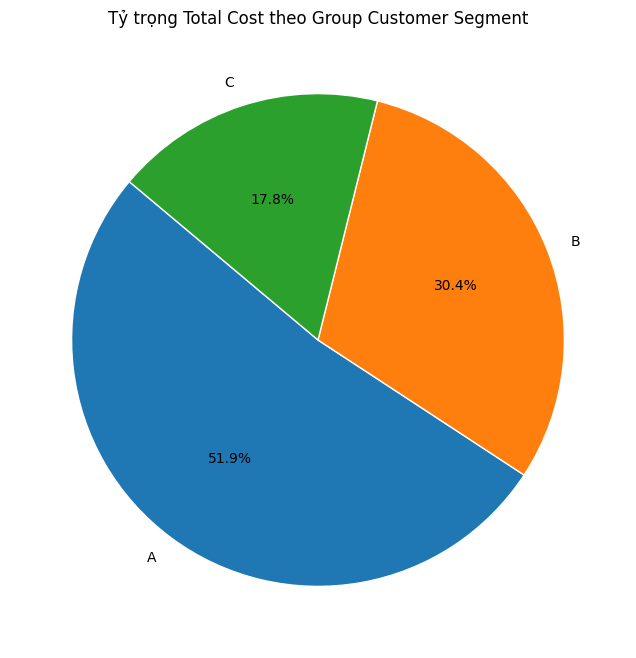

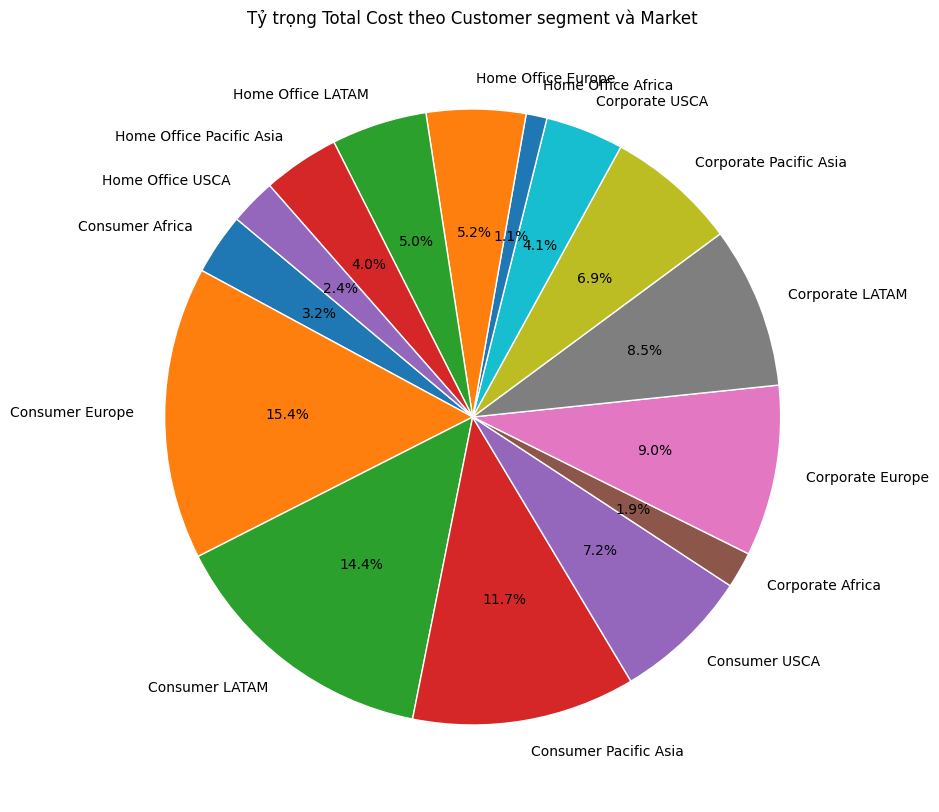

,Group Name,Total Cost,Group Type
0,A,1.509079e+07,Group Customer Segment
1,B,8.828075e+06,Group Customer Segment
2,C,5.168634e+06,Group Customer Segment
3,Consumer Africa,9.372094e+05,Customer Segment và Market
4,Consumer Europe,4.470610e+06,Customer Segment và Market
5,Consumer LATAM,4.186482e+06,Customer Segment và Market
6,Consumer Pacific Asia,3.408178e+06,Customer Segment và Market
7,Consumer USCA,2.088311e+06,Customer Segment và Market
8,Corporate Africa,5.535025e+05,Customer Segment và Market
9,Corporate Europe,2.612892e+06,Customer Segment và Market


In [97]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Tạo biến customer segment mã theo điều kiện
def map_customer_segment(seg):
    if seg == 'Consumer':
        return 'A-Consumer'
    elif seg == 'Corporate':
        return 'B-Corporate'
    elif seg == 'Home Office':
        return 'C-Home Office'
    else:
        return 'Other'

data['customer segment mã'] = data['Customer Segment'].apply(map_customer_segment)

# 2. Tạo Group Customer Segment bằng cách lấy ký tự đầu tiên
data['Group Customer Segment'] = data['customer segment mã'].str[0]

# 3. Tạo biến Customer segment và Market (nối 2 cột)
data['Customer segment và Market'] = data['Customer Segment'] + ' ' + data['Market']

# 4. Tính tổng Sales và Profit theo Group Customer Segment rồi tính Total Cost
group_sum_sales = data.groupby('Group Customer Segment')['Sales per customer'].sum()
group_sum_profit = data.groupby('Group Customer Segment')['Order Profit Per Order'].sum()
group_cost = (group_sum_sales - group_sum_profit).reset_index(name='Total Cost')

# 5. Tính tổng Sales và Profit theo Customer segment và Market rồi tính Total Cost
segment_market_sum_sales = data.groupby('Customer segment và Market')['Sales per customer'].sum()
segment_market_sum_profit = data.groupby('Customer segment và Market')['Order Profit Per Order'].sum()
segment_market_cost = (segment_market_sum_sales - segment_market_sum_profit).reset_index(name='Total Cost')

# 6. Vẽ pie chart Total Cost theo Group Customer Segment
plt.figure(figsize=(8, 8))
plt.pie(
    group_cost['Total Cost'],
    labels=group_cost['Group Customer Segment'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(edgecolor='w')
)
plt.title('Tỷ trọng Total Cost theo Group Customer Segment')
plt.show()

# 7. Vẽ pie chart Total Cost theo Customer segment và Market
plt.figure(figsize=(10, 10))
plt.pie(
    segment_market_cost['Total Cost'],
    labels=segment_market_cost['Customer segment và Market'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(edgecolor='w')
)
plt.title('Tỷ trọng Total Cost theo Customer segment và Market')
plt.show()
# Thêm cột phân loại nguồn dữ liệu
df_group_cost = group_cost.rename(columns={'Group Customer Segment': 'Group Name'})
df_group_cost['Group Type'] = 'Group Customer Segment'

df_segment_market_cost = segment_market_cost.rename(columns={'Customer segment và Market': 'Group Name'})
df_segment_market_cost['Group Type'] = 'Customer Segment và Market'

# Gộp 2 bảng lại
df_combined = pd.concat([df_group_cost, df_segment_market_cost], ignore_index=True)

# Hiển thị dataframe gộp
df_combined


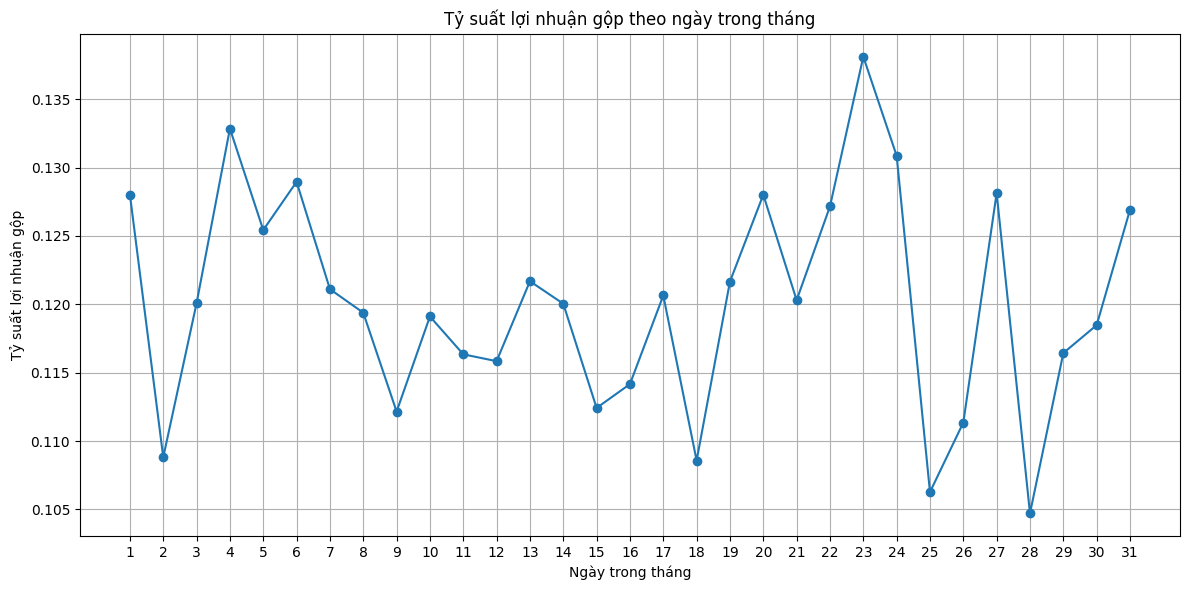

,Day,Order Profit Per Order,Sales per customer,Gross Profit Margin
0,1,143349.080569,1.119694e+06,0.128025
1,2,119464.650050,1.097913e+06,0.108811
2,3,130795.870044,1.089242e+06,0.120080
3,4,139197.800283,1.047810e+06,0.132846
4,5,129737.330420,1.034357e+06,0.125428
5,6,136099.530114,1.055388e+06,0.128957
6,7,128329.930074,1.059664e+06,0.121104
7,8,119966.250285,1.004882e+06,0.119383
8,9,114082.640445,1.017207e+06,0.112153
9,10,124234.560542,1.043055e+06,0.119106


In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi cột 'order date (DateOrders)' sang datetime nếu chưa làm
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'Day' lấy ngày trong tháng (1 đến 31)
data['Day'] = data['order date (DateOrders)'].dt.day

# Tính tổng Order Profit Per Order và Sales per customer theo Day
agg_data = data.groupby('Day').agg({
    'Order Profit Per Order': 'sum',
    'Sales per customer': 'sum'
}).reset_index()

# Tính tỷ suất lợi nhuận gộp theo ngày
agg_data['Gross Profit Margin'] = agg_data['Order Profit Per Order'] / agg_data['Sales per customer']

# Vẽ line chart tỷ suất lợi nhuận gộp theo ngày
plt.figure(figsize=(12, 6))
plt.plot(agg_data['Day'], agg_data['Gross Profit Margin'], marker='o')
plt.xlabel('Ngày trong tháng')
plt.ylabel('Tỷ suất lợi nhuận gộp')
plt.title('Tỷ suất lợi nhuận gộp theo ngày trong tháng')
plt.xticks(range(1, 32))
plt.grid(True)
plt.tight_layout()
plt.show()
# Chuyển đổi cột 'order date (DateOrders)' sang datetime nếu chưa làm
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'Day' lấy ngày trong tháng (1-31)
data['Day'] = data['order date (DateOrders)'].dt.day

# Tính tổng Order Profit Per Order và Sales per customer theo Day
agg_data = data.groupby('Day').agg({
    'Order Profit Per Order': 'sum',
    'Sales per customer': 'sum'
}).reset_index()

# Tính tỷ suất lợi nhuận gộp theo ngày
agg_data['Gross Profit Margin'] = agg_data['Order Profit Per Order'] / agg_data['Sales per customer']

# Hiển thị dataframe kết quả
agg_data


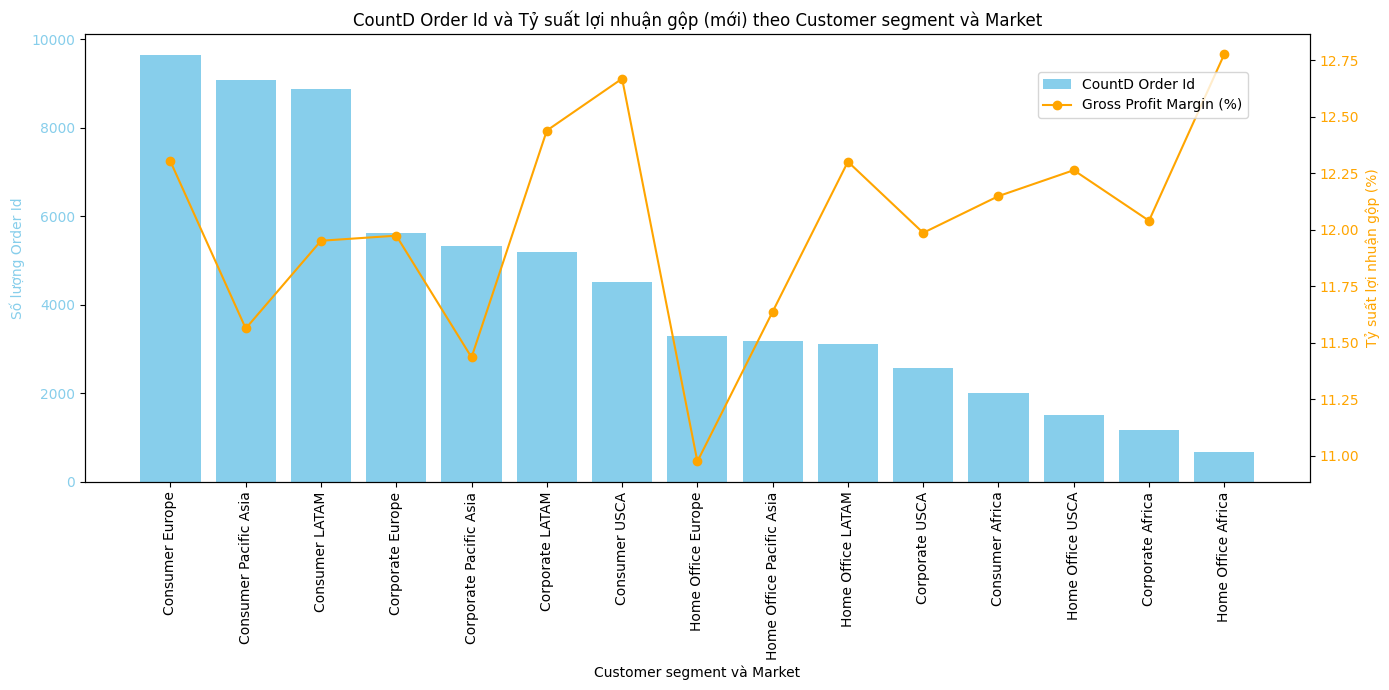

,Customer segment và Market,Order Profit Per Order,Sales per customer,CountD Order Id,Gross Profit Margin (new)
0,Consumer Africa,129600.889959,1.066810e+06,2009,12.148448
1,Consumer Europe,627099.000311,5.097709e+06,9639,12.301585
2,Consumer LATAM,568246.210506,4.754728e+06,8884,11.951181
3,Consumer Pacific Asia,445629.430767,3.853807e+06,9078,11.563355
4,Consumer USCA,302912.140371,2.391223e+06,4509,12.667664
5,Corporate Africa,75761.369980,6.292639e+05,1167,12.039682
6,Corporate Europe,355412.120425,2.968304e+06,5617,11.973577
7,Corporate LATAM,350573.820505,2.818497e+06,5184,12.438326
8,Corporate Pacific Asia,258109.510353,2.257030e+06,5318,11.435803
9,Corporate USCA,162718.140245,1.357556e+06,2570,11.986113


In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử biến 'data' đã có, và biến 'Customer segment và Market' đã được tạo như sau:
# data['Customer segment và Market'] = data['Customer Segment'] + ' ' + data['Market']

# 1. Tính tổng Order Profit Per Order và Sales per customer theo Customer segment và Market
agg_profit = data.groupby('Customer segment và Market').agg({
    'Order Profit Per Order': 'sum',
    'Sales per customer': 'sum',
    'Order Id': pd.Series.nunique  # Count distinct Order Id
}).reset_index().rename(columns={'Order Id': 'CountD Order Id'})

# 2. Tính tỷ suất lợi nhuận gộp (mới) theo %
agg_profit['Gross Profit Margin (new)'] = (agg_profit['Order Profit Per Order'] / agg_profit['Sales per customer']) * 100

# 3. Sắp xếp theo CountD Order Id để biểu diễn rõ hơn
agg_profit = agg_profit.sort_values(by='CountD Order Id', ascending=False)

# 4. Vẽ histogram (bar chart) và line chart trên cùng
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart cho số lượng Order Id
ax1.bar(agg_profit['Customer segment và Market'], agg_profit['CountD Order Id'], color='skyblue', label='CountD Order Id')
ax1.set_xlabel('Customer segment và Market')
ax1.set_ylabel('Số lượng Order Id', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=90)

# Tạo trục y thứ 2 để vẽ line chart
ax2 = ax1.twinx()
ax2.plot(agg_profit['Customer segment và Market'], agg_profit['Gross Profit Margin (new)'], color='orange', marker='o', label='Gross Profit Margin (%)')
ax2.set_ylabel('Tỷ suất lợi nhuận gộp (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Tiêu đề và legend
plt.title('CountD Order Id và Tỷ suất lợi nhuận gộp (mới) theo Customer segment và Market')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.show()
# Tính tổng Order Profit Per Order, Sales per customer và CountD Order Id theo Customer segment và Market
agg_profit = data.groupby('Customer segment và Market').agg({
    'Order Profit Per Order': 'sum',
    'Sales per customer': 'sum',
    'Order Id': pd.Series.nunique
}).reset_index().rename(columns={'Order Id': 'CountD Order Id'})

# Tính tỷ suất lợi nhuận gộp (mới) theo %
agg_profit['Gross Profit Margin (new)'] = (agg_profit['Order Profit Per Order'] / agg_profit['Sales per customer']) * 100

# Hiển thị dataframe kết quả
agg_profit


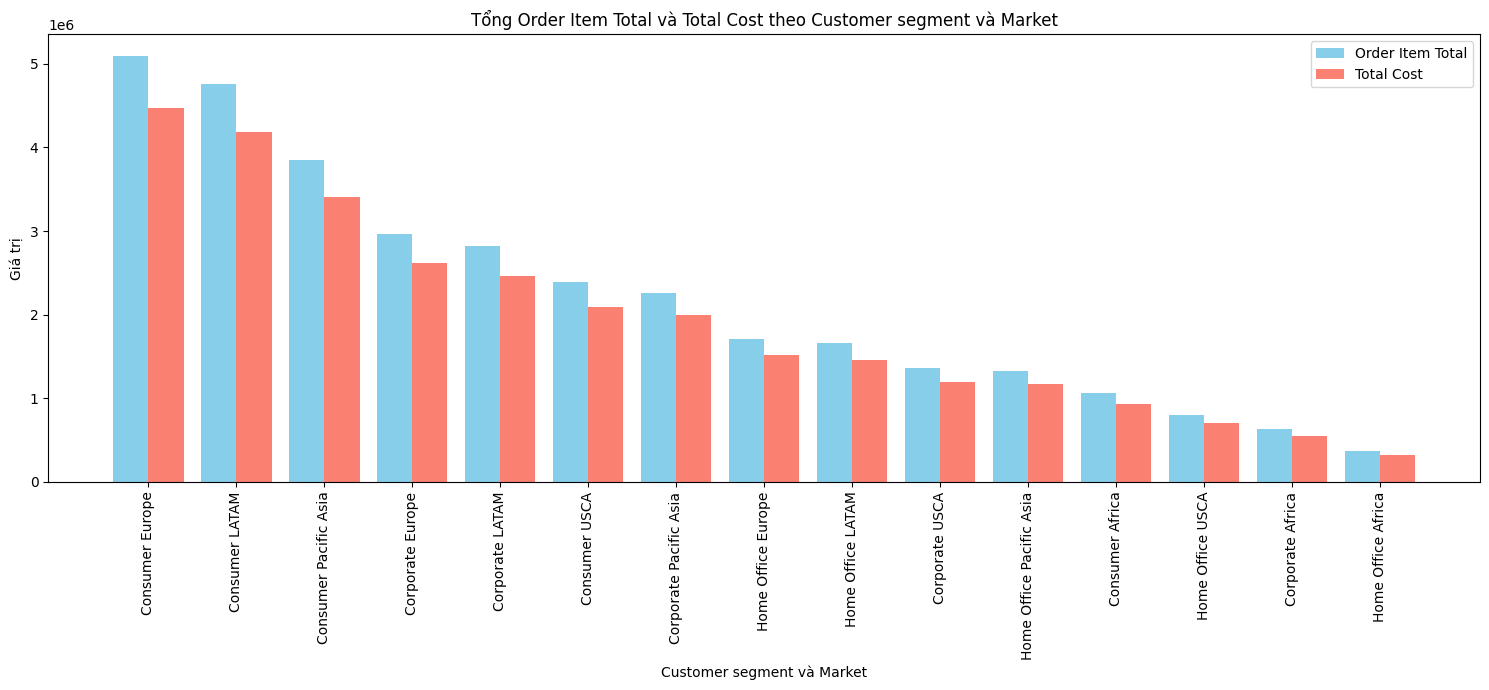

,Customer segment và Market,Order Item Total,Sales per customer,Order Profit Per Order,Total Cost
0,Consumer Africa,1.066810e+06,1.066810e+06,129600.889959,9.372094e+05
1,Consumer Europe,5.097709e+06,5.097709e+06,627099.000311,4.470610e+06
2,Consumer LATAM,4.754728e+06,4.754728e+06,568246.210506,4.186482e+06
3,Consumer Pacific Asia,3.853807e+06,3.853807e+06,445629.430767,3.408178e+06
4,Consumer USCA,2.391223e+06,2.391223e+06,302912.140371,2.088311e+06
5,Corporate Africa,6.292639e+05,6.292639e+05,75761.369980,5.535025e+05
6,Corporate Europe,2.968304e+06,2.968304e+06,355412.120425,2.612892e+06
7,Corporate LATAM,2.818497e+06,2.818497e+06,350573.820505,2.467923e+06
8,Corporate Pacific Asia,2.257030e+06,2.257030e+06,258109.510353,1.998920e+06
9,Corporate USCA,1.357556e+06,1.357556e+06,162718.140245,1.194837e+06


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Tính tổng Order Item Total, Sales per customer và Order Profit Per Order theo Customer segment và Market
agg = data.groupby('Customer segment và Market').agg({
    'Order Item Total': 'sum',
    'Sales per customer': 'sum',
    'Order Profit Per Order': 'sum'
}).reset_index()

# 2. Tính Total Cost theo công thức
agg['Total Cost'] = agg['Sales per customer'] - agg['Order Profit Per Order']

# 3. Sắp xếp theo Order Item Total hoặc theo Customer segment và Market nếu muốn
agg = agg.sort_values(by='Order Item Total', ascending=False)

# 4. Vẽ biểu đồ cột nhóm (side-by-side bar chart)
x = np.arange(len(agg))
width = 0.4

fig, ax = plt.subplots(figsize=(15, 7))

bars1 = ax.bar(x - width/2, agg['Order Item Total'], width, label='Order Item Total', color='skyblue')
bars2 = ax.bar(x + width/2, agg['Total Cost'], width, label='Total Cost', color='salmon')

ax.set_xlabel('Customer segment và Market')
ax.set_ylabel('Giá trị')
ax.set_title('Tổng Order Item Total và Total Cost theo Customer segment và Market')
ax.set_xticks(x)
ax.set_xticklabels(agg['Customer segment và Market'], rotation=90)

ax.legend()
plt.tight_layout()
plt.show()
# Tính tổng Order Item Total, Sales per customer và Order Profit Per Order theo Customer segment và Market
agg = data.groupby('Customer segment và Market').agg({
    'Order Item Total': 'sum',
    'Sales per customer': 'sum',
    'Order Profit Per Order': 'sum'
}).reset_index()

# Tính Total Cost
agg['Total Cost'] = agg['Sales per customer'] - agg['Order Profit Per Order']

# Hiển thị dataframe kết quả
agg


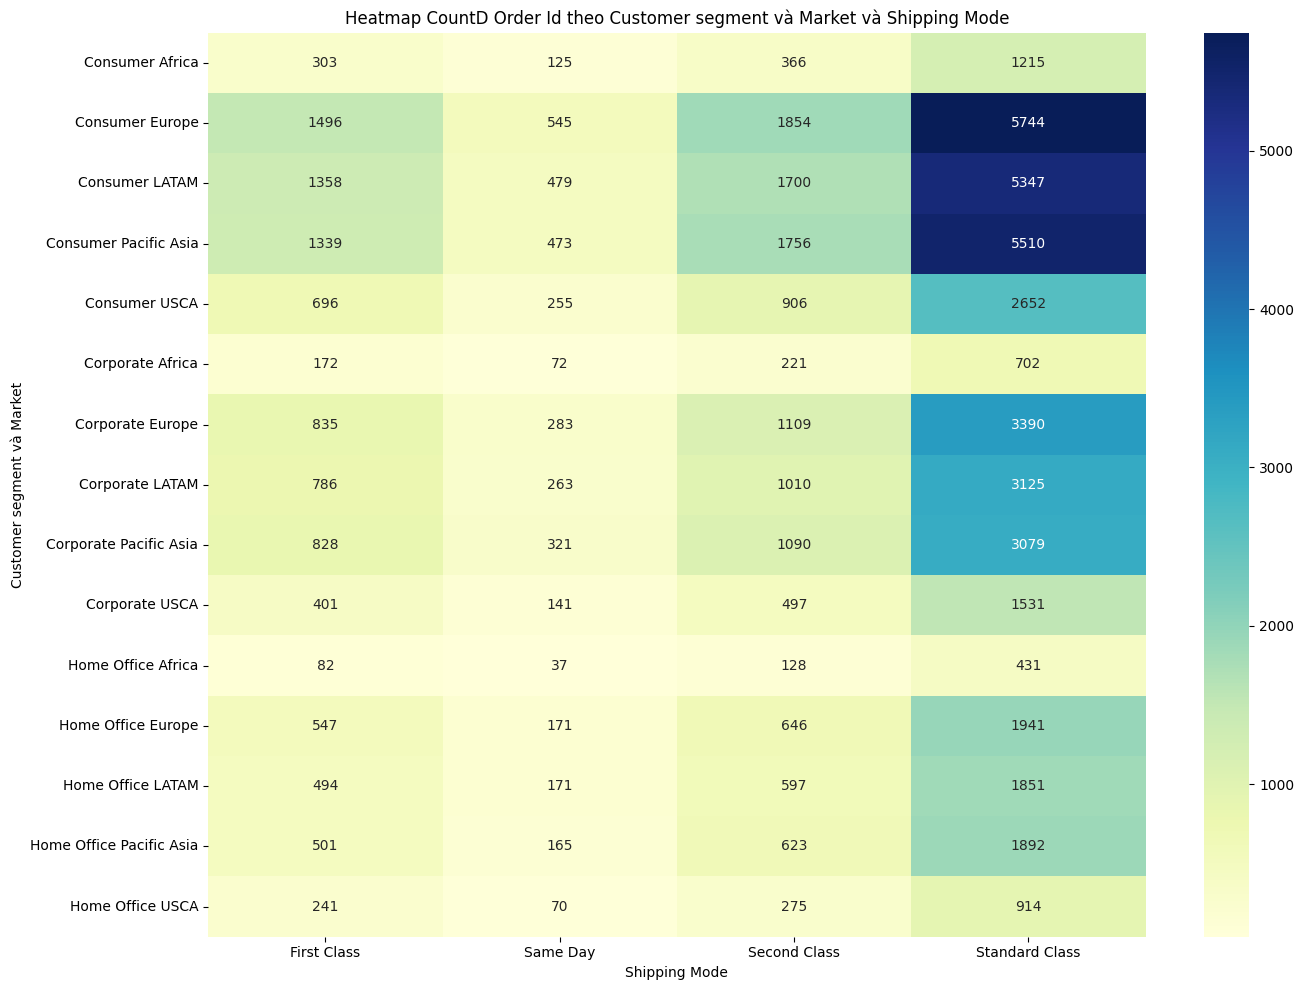

,Customer segment và Market,Shipping Mode,CountD Order Id
0,Consumer Africa,First Class,303
1,Consumer Africa,Same Day,125
2,Consumer Africa,Second Class,366
3,Consumer Africa,Standard Class,1215
4,Consumer Europe,First Class,1496
5,Consumer Europe,Same Day,545
6,Consumer Europe,Second Class,1854
7,Consumer Europe,Standard Class,5744
8,Consumer LATAM,First Class,1358
9,Consumer LATAM,Same Day,479


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tính CountD (số lượng Order Id duy nhất) theo Customer segment và Market và Shipping Mode
countd_data = data.groupby(['Customer segment và Market', 'Shipping Mode'])['Order Id'].nunique().reset_index(name='CountD Order Id')

# 2. Tạo bảng pivot để vẽ heatmap
pivot_table = countd_data.pivot(index='Customer segment và Market', columns='Shipping Mode', values='CountD Order Id').fillna(0)

# 3. Vẽ heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')

plt.title('Heatmap CountD Order Id theo Customer segment và Market và Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Customer segment và Market')

plt.tight_layout()
plt.show()
# Tính số lượng Order Id duy nhất theo Customer segment và Market và Shipping Mode
countd_data = data.groupby(['Customer segment và Market', 'Shipping Mode'])['Order Id'].nunique().reset_index(name='CountD Order Id')

# Hiển thị dataframe kết quả
countd_data


## Hành vi mua hàng của khách hàng

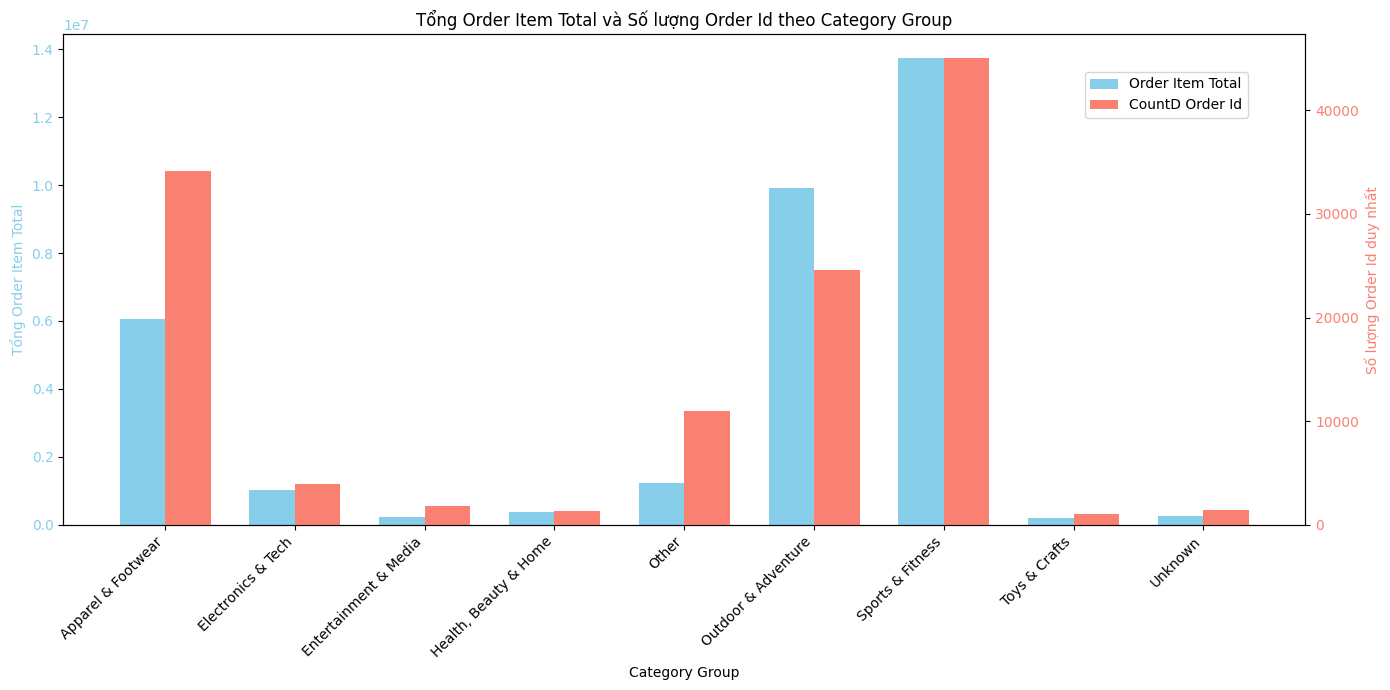

,Category Group,Order Item Total,CountD Order Id
0,Apparel & Footwear,6.057763e+06,34172
1,Electronics & Tech,1.026660e+06,3934
2,Entertainment & Media,2.214455e+05,1823
3,"Health, Beauty & Home",3.644419e+05,1338
4,Other,1.238853e+06,10959
5,Outdoor & Adventure,9.927719e+06,24551
6,Sports & Fitness,1.374582e+07,45053
7,Toys & Crafts,2.061906e+05,1013
8,Unknown,2.655075e+05,1475


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Định nghĩa danh sách các nhóm Category
sports_fitness = [
    "Baseball & Softball", "Basketball", "Boxing & MMA", "Cardio Equipment", "Cleats", "Fitness Accessories",
    "Golf Apparel", "Golf Bags & Carts", "Golf Balls", "Golf Gloves", "Golf Shoes", "Hockey",
    "Hunting & Shooting", "Indoor/Outdoor Games", "Kids' Golf Clubs", "Lacrosse", "Men's Golf Clubs",
    "Soccer", "Sporting Goods", "Strength Training", "Tennis & Racquet", "Water Sports", "Women's Golf Clubs"
]

apparel_footwear = [
    "Accessories", "Children's Clothing", "Girls' Apparel", "Men's Clothing", "Men's Footwear", "Women's Apparel",
    "Women's Clothing"
]

entertainment_media = [
    "As Seen on  TV!", "Books", "CDs", "DVDs", "Music", "Video Games"
]

electronics_tech = [
    "Cameras", "Computers", "Consumer Electronics", "Electronics"
]

toys_crafts = [
    "Toys", "Crafts"
]

health_beauty_home = [
    "Baby", "Garden", "Health and Beauty", "Pet Supplies"
]

outdoor_adventure = [
    "Camping & Hiking", "Fishing"
]

other = [
    "Shop By Sport", "Trade-In"
]

def categorize_category(name):
    if name in sports_fitness:
        return "Sports & Fitness"
    elif name in apparel_footwear:
        return "Apparel & Footwear"
    elif name in entertainment_media:
        return "Entertainment & Media"
    elif name in electronics_tech:
        return "Electronics & Tech"
    elif name in toys_crafts:
        return "Toys & Crafts"
    elif name in health_beauty_home:
        return "Health, Beauty & Home"
    elif name in outdoor_adventure:
        return "Outdoor & Adventure"
    elif name in other:
        return "Other"
    else:
        return "Unknown"

# Tạo cột Category Group
data['Category Group'] = data['Category Name'].apply(categorize_category)

# Tính tổng Order Item Total và CountD Order Id theo Category Group
agg = data.groupby('Category Group').agg({
    'Order Item Total': 'sum',
    'Order Id': pd.Series.nunique
}).reset_index().rename(columns={'Order Id': 'CountD Order Id'})

# Vẽ biểu đồ cột với 2 trục y
x = np.arange(len(agg))
width = 0.35

fig, ax1 = plt.subplots(figsize=(14, 7))

bars1 = ax1.bar(x - width/2, agg['Order Item Total'], width, label='Order Item Total', color='skyblue')
ax1.set_xlabel('Category Group')
ax1.set_ylabel('Tổng Order Item Total', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, agg['CountD Order Id'], width, label='CountD Order Id', color='salmon')
ax2.set_ylabel('Số lượng Order Id duy nhất', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

ax1.set_xticks(x)
ax1.set_xticklabels(agg['Category Group'], rotation=45, ha='right')

fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.title('Tổng Order Item Total và Số lượng Order Id theo Category Group')
plt.tight_layout()
plt.show()
# Định nghĩa danh sách các nhóm Category
sports_fitness = [
    "Baseball & Softball", "Basketball", "Boxing & MMA", "Cardio Equipment", "Cleats", "Fitness Accessories",
    "Golf Apparel", "Golf Bags & Carts", "Golf Balls", "Golf Gloves", "Golf Shoes", "Hockey",
    "Hunting & Shooting", "Indoor/Outdoor Games", "Kids' Golf Clubs", "Lacrosse", "Men's Golf Clubs",
    "Soccer", "Sporting Goods", "Strength Training", "Tennis & Racquet", "Water Sports", "Women's Golf Clubs"
]

apparel_footwear = [
    "Accessories", "Children's Clothing", "Girls' Apparel", "Men's Clothing", "Men's Footwear", "Women's Apparel",
    "Women's Clothing"
]

entertainment_media = [
    "As Seen on  TV!", "Books", "CDs", "DVDs", "Music", "Video Games"
]

electronics_tech = [
    "Cameras", "Computers", "Consumer Electronics", "Electronics"
]

toys_crafts = [
    "Toys", "Crafts"
]

health_beauty_home = [
    "Baby", "Garden", "Health and Beauty", "Pet Supplies"
]

outdoor_adventure = [
    "Camping & Hiking", "Fishing"
]

other = [
    "Shop By Sport", "Trade-In"
]

def categorize_category(name):
    if name in sports_fitness:
        return "Sports & Fitness"
    elif name in apparel_footwear:
        return "Apparel & Footwear"
    elif name in entertainment_media:
        return "Entertainment & Media"
    elif name in electronics_tech:
        return "Electronics & Tech"
    elif name in toys_crafts:
        return "Toys & Crafts"
    elif name in health_beauty_home:
        return "Health, Beauty & Home"
    elif name in outdoor_adventure:
        return "Outdoor & Adventure"
    elif name in other:
        return "Other"
    else:
        return "Unknown"

# Tạo cột Category Group
data['Category Group'] = data['Category Name'].apply(categorize_category)

# Tính tổng Order Item Total và CountD Order Id theo Category Group
agg = data.groupby('Category Group').agg({
    'Order Item Total': 'sum',
    'Order Id': pd.Series.nunique
}).reset_index().rename(columns={'Order Id': 'CountD Order Id'})

# Hiển thị dataframe
agg


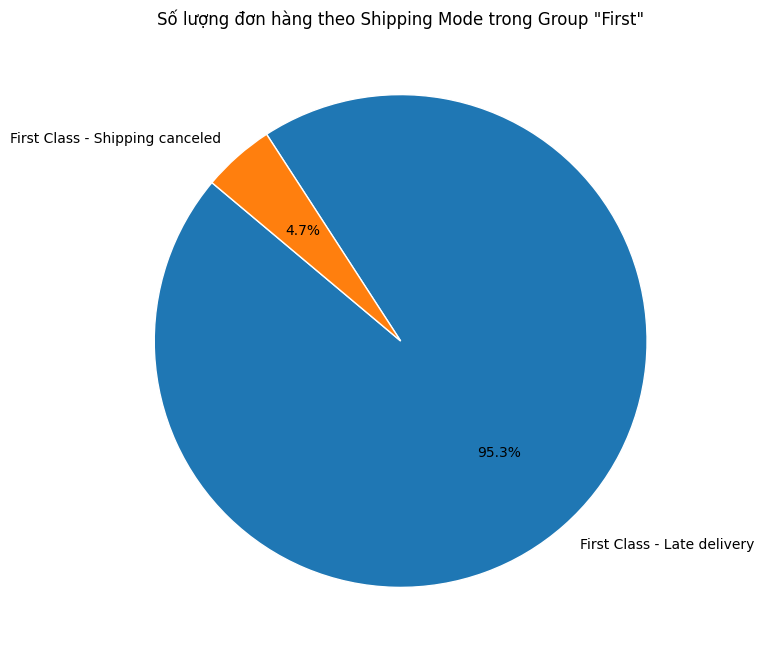

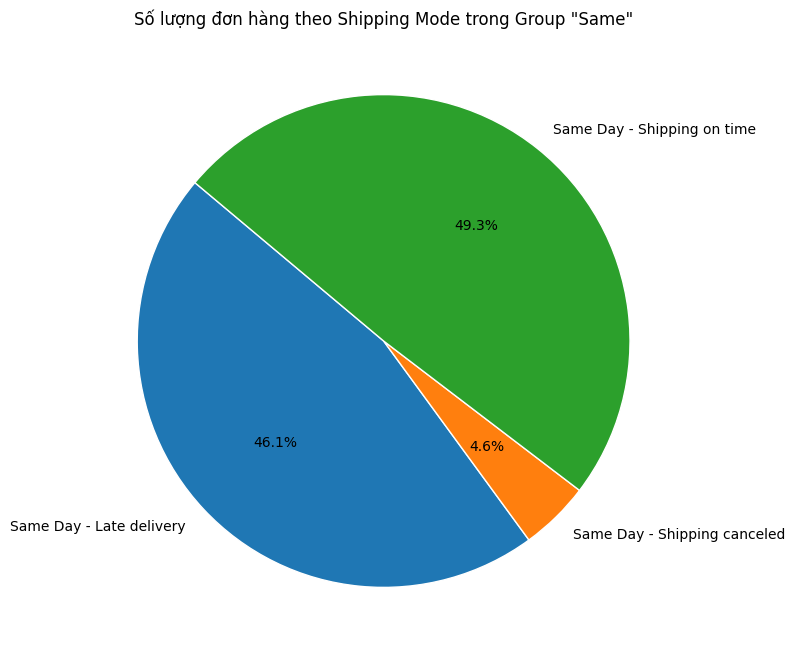

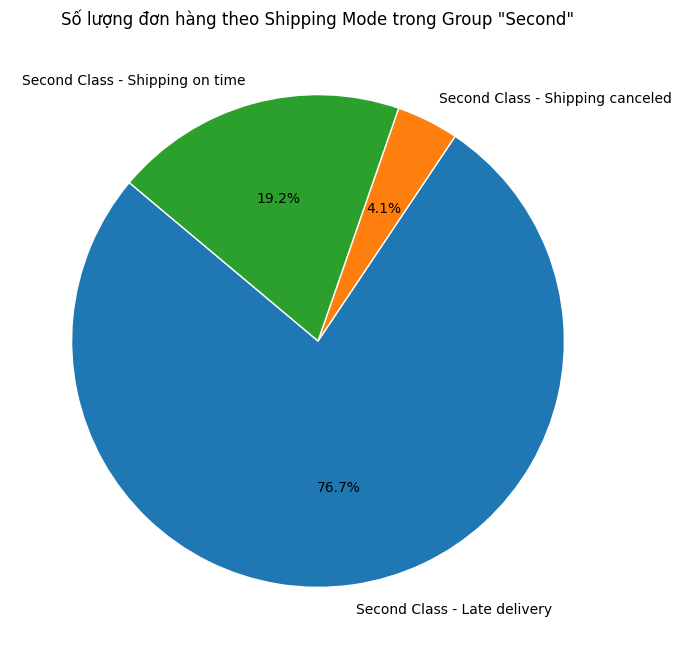

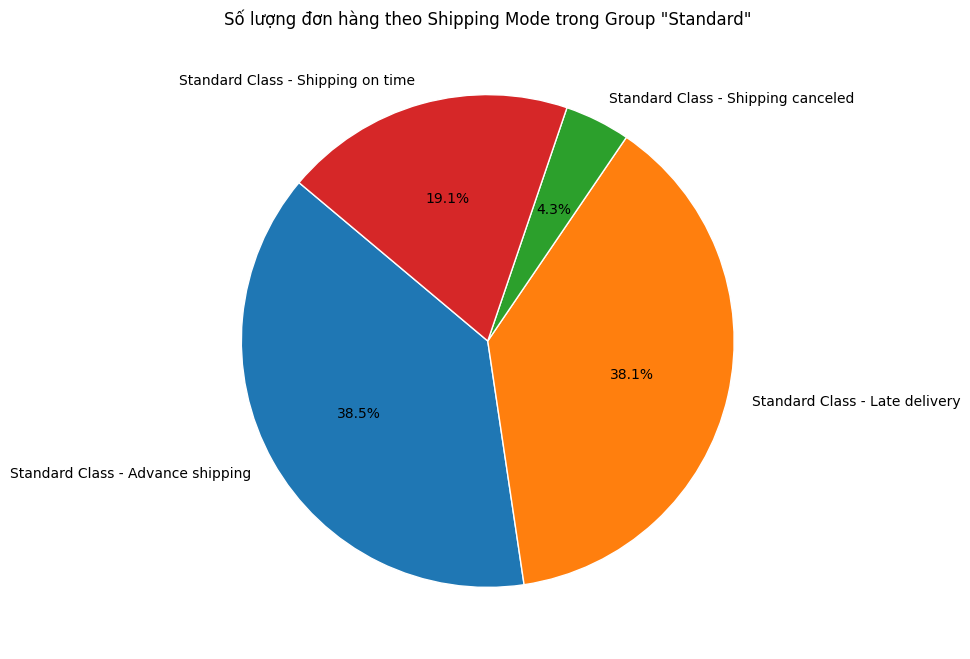

,Group Shipping Mode,Shipping Mode,Delivery Status,CountD Order Id
0,First,First Class,Late delivery,9602
1,First,First Class,Shipping canceled,477
2,Same,Same Day,Late delivery,1648
3,Same,Same Day,Shipping canceled,164
4,Same,Same Day,Shipping on time,1759
5,Second,Second Class,Late delivery,9803
6,Second,Second Class,Shipping canceled,522
7,Second,Second Class,Shipping on time,2453
8,Standard,Standard Class,Advance shipping,15127
9,Standard,Standard Class,Late delivery,14995


In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Tạo biến Group Shipping Mode
def extract_group_shipping_mode(mode):
    if pd.isna(mode):
        return mode
    parts = mode.split(' ')
    return parts[0] if len(parts) > 1 else mode

data['Group Shipping Mode'] = data['Shipping Mode'].apply(extract_group_shipping_mode)

# 2. Tính số lượng đơn hàng duy nhất theo Shipping Mode, Group Shipping Mode, Delivery Status
order_counts = data.groupby(['Group Shipping Mode', 'Shipping Mode', 'Delivery Status'])['Order Id'] \
    .nunique().reset_index(name='CountD Order Id')

# 3. Vẽ pie chart cho mỗi Group Shipping Mode và Delivery Status
groups = order_counts['Group Shipping Mode'].unique()

for group in groups:
    subset = order_counts[order_counts['Group Shipping Mode'] == group]
    plt.figure(figsize=(8, 8))
    plt.pie(
        subset['CountD Order Id'],
        labels=subset['Shipping Mode'] + ' - ' + subset['Delivery Status'],
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops=dict(edgecolor='w')
    )
    plt.title(f'Số lượng đơn hàng theo Shipping Mode trong Group "{group}"')
    plt.show()
# Tạo biến Group Shipping Mode
def extract_group_shipping_mode(mode):
    if pd.isna(mode):
        return mode
    parts = mode.split(' ')
    return parts[0] if len(parts) > 1 else mode

data['Group Shipping Mode'] = data['Shipping Mode'].apply(extract_group_shipping_mode)

# Tính số lượng đơn hàng duy nhất theo Shipping Mode, Group Shipping Mode, Delivery Status
order_counts = data.groupby(['Group Shipping Mode', 'Shipping Mode', 'Delivery Status'])['Order Id'] \
    .nunique().reset_index(name='CountD Order Id')

# Hiển thị dataframe
order_counts


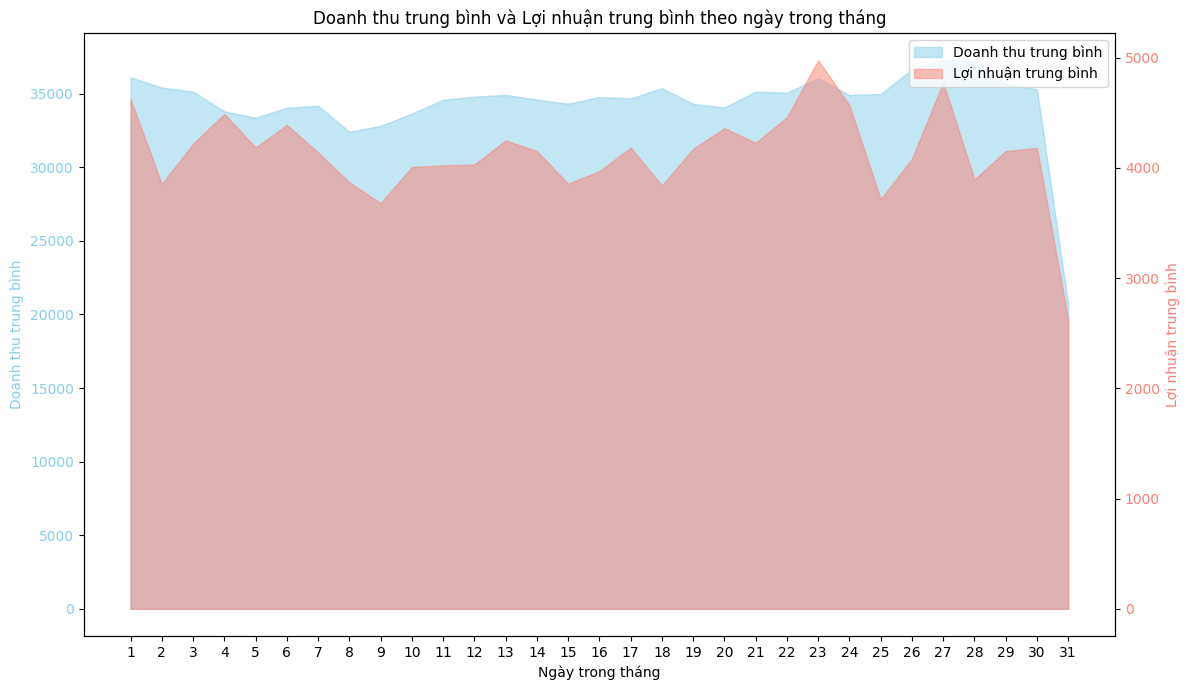

,Day,Doanh thu tb,Lợi nhuận,Lợi nhuận trung bình
0,1,36119.0,143349.080569,127.195280
1,2,35417.0,119464.650050,106.002351
2,3,35137.0,130795.870044,116.056673
3,4,33800.0,139197.800283,123.511801
4,5,33366.0,129737.330420,115.117418
5,6,34045.0,136099.530114,120.762671
6,7,34183.0,128329.930074,113.868616
7,8,32416.0,119966.250285,106.447427
8,9,32813.0,114082.640445,101.226833
9,10,33647.0,124234.560542,110.234748


In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Đảm bảo cột ngày là datetime
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột Day lấy ngày trong tháng (1-31)
data['Day'] = data['order date (DateOrders)'].dt.day

# Tính số ngày duy nhất có dữ liệu (không phân biệt năm/tháng)
unique_days_count = data['Day'].nunique()

# Tính tổng Sales per customer theo từng ngày
total_sales_per_day = data.groupby('Day')['Sales per customer'].sum()

# Doanh thu trung bình theo ngày (tổng Sales / số ngày duy nhất), làm tròn 0 chữ số
avg_revenue_per_day = round(total_sales_per_day / unique_days_count, 0)

# Tính tổng Order Profit Per Order theo từng ngày
total_profit_per_day = data.groupby('Day')['Order Profit Per Order'].sum()

# Lợi nhuận trung bình theo ngày = tổng lợi nhuận từng ngày / tổng số ngày duy nhất
avg_profit_per_day = total_profit_per_day / unique_days_count

# Tạo dataframe để vẽ
df_plot = pd.DataFrame({
    'Day': avg_revenue_per_day.index,
    'Avg Revenue': avg_revenue_per_day.values,
    'Avg Profit': avg_profit_per_day.values
})

# Vẽ area chart với 2 trục y
fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.fill_between(df_plot['Day'], df_plot['Avg Revenue'], color='skyblue', alpha=0.5, label='Doanh thu trung bình')
ax1.set_xlabel('Ngày trong tháng')
ax1.set_ylabel('Doanh thu trung bình', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.fill_between(df_plot['Day'], df_plot['Avg Profit'], color='salmon', alpha=0.5, label='Lợi nhuận trung bình')
ax2.set_ylabel('Lợi nhuận trung bình', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

plt.title('Doanh thu trung bình và Lợi nhuận trung bình theo ngày trong tháng')
plt.xticks(range(1, 32))
fig.tight_layout()

# Hiện legend
lines, labels = [], []
for ax in [ax1, ax2]:
    line, label = ax.get_legend_handles_labels()
    lines += line
    labels += label
plt.legend(lines, labels, loc='upper right')

plt.show()
# Chuyển cột 'order date (DateOrders)' sang datetime nếu chưa làm
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột Day lấy ngày trong tháng
data['Day'] = data['order date (DateOrders)'].dt.day

# Tính tổng Sales per customer và số ngày duy nhất để tính doanh thu trung bình theo ngày
daily_sales_sum = data.groupby('Day')['Sales per customer'].sum()
unique_days_count = data['Day'].nunique()
daily_revenue_avg = (daily_sales_sum / unique_days_count).round(0).reset_index(name='Doanh thu tb')

# Tính tổng Order Profit Per Order theo ngày
daily_profit_sum = data.groupby('Day')['Order Profit Per Order'].sum().reset_index(name='Lợi nhuận')

# Tính tổng số ngày duy nhất (của toàn bộ dataset)
total_unique_days = data['order date (DateOrders)'].dt.normalize().nunique()

# Tính lợi nhuận trung bình = tổng lợi nhuận ngày chia tổng số ngày duy nhất
daily_profit_sum['Lợi nhuận trung bình'] = daily_profit_sum['Lợi nhuận'] / total_unique_days

# Gộp 2 dataframe theo cột 'Day'
daily_combined = pd.merge(daily_revenue_avg, daily_profit_sum, on='Day', how='inner')

# Hiển thị dataframe gộp
daily_combined



# chưa được


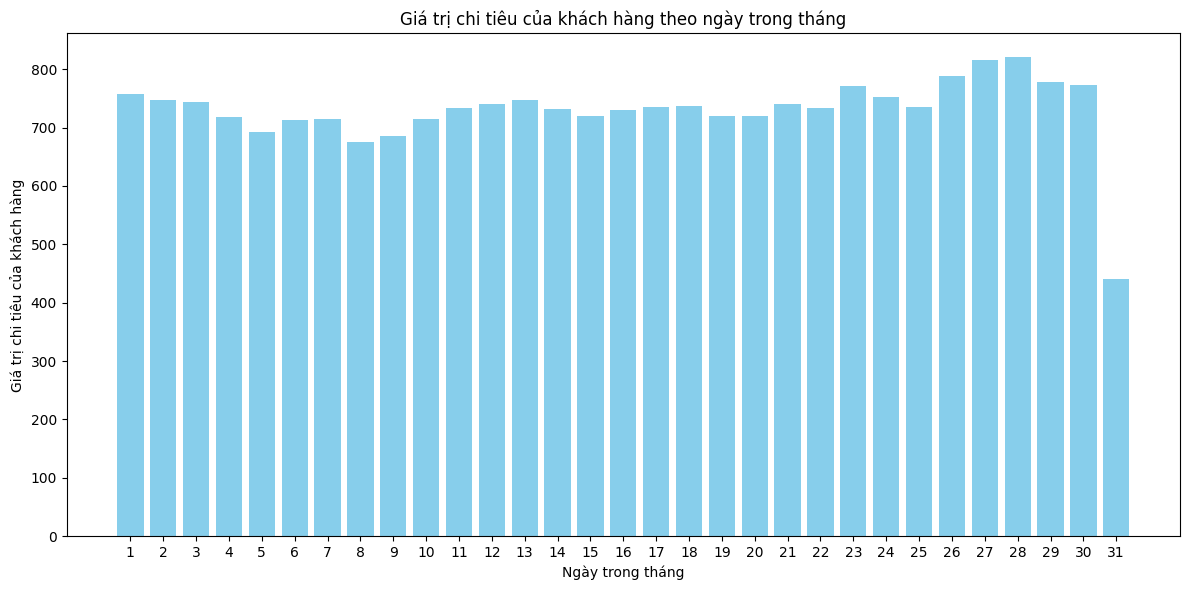

,Day,Giá trị chi tiêu của khách hàng
0,1,757.239051
1,2,747.422272
2,3,743.049104
3,4,718.353203
4,5,692.709812
5,6,713.562324
6,7,714.511784
7,8,675.201721
8,9,685.350443
9,10,714.257320


In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Đảm bảo cột 'order date (DateOrders)' là datetime
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Lấy ngày trong tháng
data['Day'] = data['order date (DateOrders)'].dt.day

# Tính tổng Product Price theo ngày
daily_sum = data.groupby('Day')['Product Price'].sum()

# Tính số ngày duy nhất trong dữ liệu (bỏ qua năm-tháng)
unique_days_count = data['order date (DateOrders)'].dt.normalize().nunique()

# Tính Giá trị chi tiêu của khách hàng theo ngày trong tháng
daily_spending = (daily_sum / unique_days_count).reset_index(name='Giá trị chi tiêu của khách hàng')

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(daily_spending['Day'], daily_spending['Giá trị chi tiêu của khách hàng'], color='skyblue')

plt.xlabel('Ngày trong tháng')
plt.ylabel('Giá trị chi tiêu của khách hàng')
plt.title('Giá trị chi tiêu của khách hàng theo ngày trong tháng')
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()
# Đảm bảo cột 'order date (DateOrders)' là datetime
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Lấy ngày trong tháng
data['Day'] = data['order date (DateOrders)'].dt.day

# Tính tổng Product Price theo ngày
daily_sum = data.groupby('Day')['Product Price'].sum()

# Tính số ngày duy nhất trong dữ liệu (bỏ qua năm-tháng)
unique_days_count = data['order date (DateOrders)'].dt.normalize().nunique()

# Tính Giá trị chi tiêu của khách hàng theo ngày trong tháng
daily_spending = (daily_sum / unique_days_count).reset_index(name='Giá trị chi tiêu của khách hàng')

# Hiển thị dataframe
daily_spending


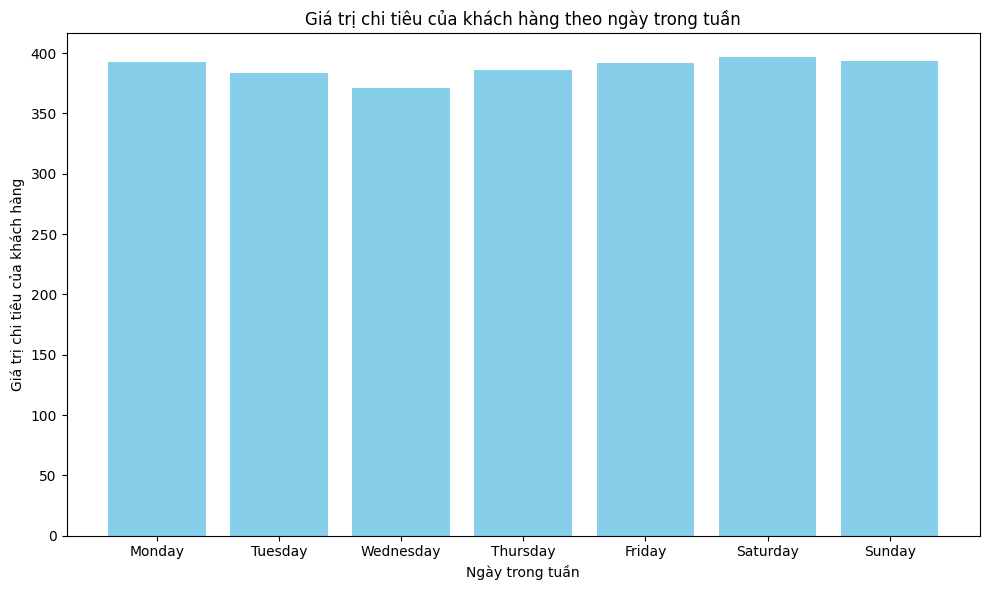

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Đảm bảo cột 'order date (DateOrders)' là datetime
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo cột 'DayOfWeek' lấy tên ngày trong tuần (Monday, Tuesday, ...)
data['DayOfWeek'] = data['order date (DateOrders)'].dt.day_name()

# Tính tổng Product Price theo từng ngày trong tuần
weekly_sum = data.groupby('DayOfWeek')['Product Price'].sum()

# Tính số ngày duy nhất trong dữ liệu (bỏ qua năm-tháng) theo từng ngày trong tuần
unique_days_per_weekday = data.groupby('DayOfWeek')['order date (DateOrders)'].nunique()

# Tính Giá trị chi tiêu của khách hàng theo ngày trong tuần
weekly_spending = (weekly_sum / unique_days_per_weekday).reset_index(name='Giá trị chi tiêu của khách hàng')

# Sắp xếp thứ tự ngày trong tuần cho trực quan
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_spending['DayOfWeek'] = pd.Categorical(weekly_spending['DayOfWeek'], categories=days_order, ordered=True)
weekly_spending = weekly_spending.sort_values('DayOfWeek')

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(weekly_spending['DayOfWeek'], weekly_spending['Giá trị chi tiêu của khách hàng'], color='skyblue')

plt.xlabel('Ngày trong tuần')
plt.ylabel('Giá trị chi tiêu của khách hàng')
plt.title('Giá trị chi tiêu của khách hàng theo ngày trong tuần')
plt.tight_layout()
plt.show()


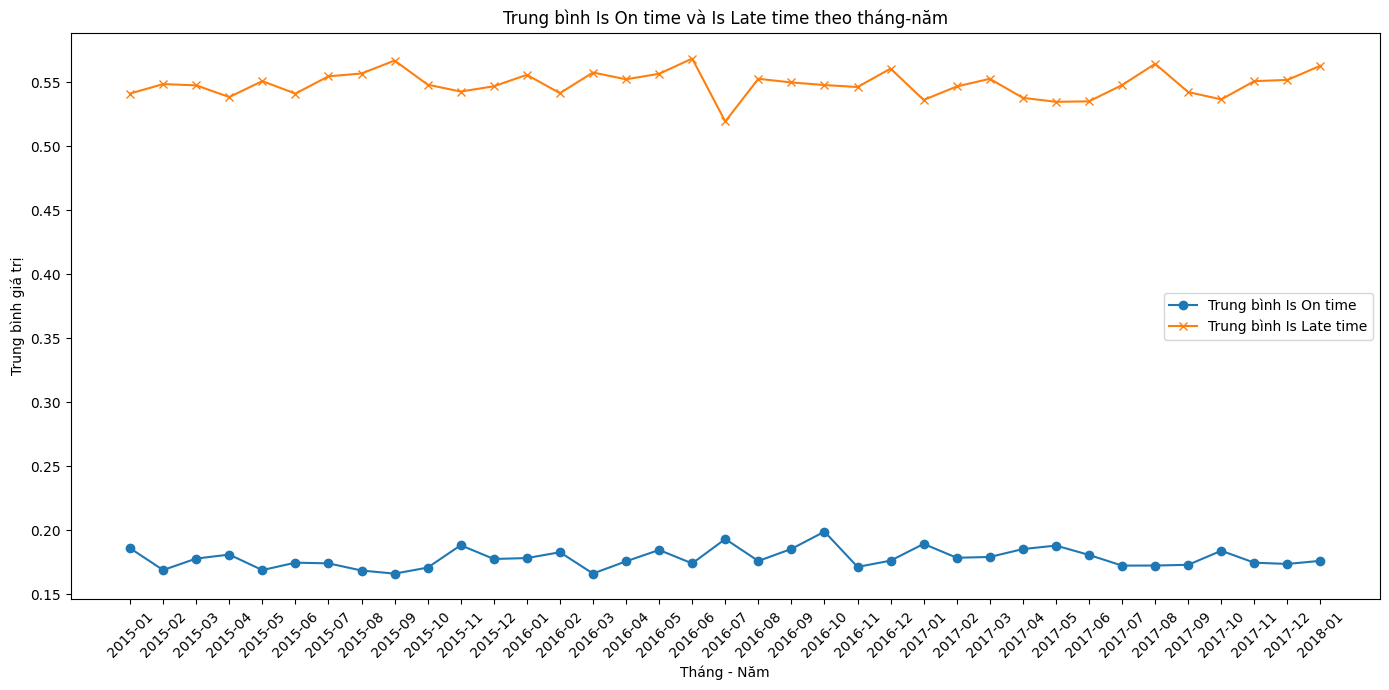

,Year-Month,Is On time,Is Late time
0,2015-01,0.186020,0.541150
1,2015-02,0.168957,0.548530
2,2015-03,0.177919,0.547557
3,2015-04,0.181038,0.538432
4,2015-05,0.168938,0.550868
5,2015-06,0.174718,0.541099
6,2015-07,0.174184,0.554633
7,2015-08,0.168595,0.556799
8,2015-09,0.166148,0.566926
9,2015-10,0.170879,0.548095


In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Đảm bảo cột 'order date (DateOrders)' là datetime
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo biến Is On time và Is Late time
data['Is On time'] = data['Delivery Status'].apply(lambda x: 1 if x == 'Shipping on time' else 0)
data['Is Late time'] = data['Delivery Status'].apply(lambda x: 1 if x == 'Late delivery' else 0)

# Tạo cột Year-Month để nhóm theo tháng năm
data['Year-Month'] = data['order date (DateOrders)'].dt.to_period('M').astype(str)

# Tính trung bình Is On time và Is Late time theo tháng-năm
monthly_avg = data.groupby('Year-Month').agg({
    'Is On time': 'mean',
    'Is Late time': 'mean'
}).reset_index()

# Vẽ line chart
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg['Year-Month'], monthly_avg['Is On time'], marker='o', label='Trung bình Is On time')
plt.plot(monthly_avg['Year-Month'], monthly_avg['Is Late time'], marker='x', label='Trung bình Is Late time')

plt.xlabel('Tháng - Năm')
plt.ylabel('Trung bình giá trị')
plt.title('Trung bình Is On time và Is Late time theo tháng-năm')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# Đảm bảo cột 'order date (DateOrders)' là datetime
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Tạo biến Is On time và Is Late time
data['Is On time'] = data['Delivery Status'].apply(lambda x: 1 if x == 'Shipping on time' else 0)
data['Is Late time'] = data['Delivery Status'].apply(lambda x: 1 if x == 'Late delivery' else 0)

# Tạo cột Year-Month để nhóm theo tháng năm
data['Year-Month'] = data['order date (DateOrders)'].dt.to_period('M').astype(str)

# Tính trung bình Is On time và Is Late time theo tháng-năm
monthly_avg = data.groupby('Year-Month').agg({
    'Is On time': 'mean',
    'Is Late time': 'mean'
}).reset_index()

# Hiển thị dataframe
monthly_avg


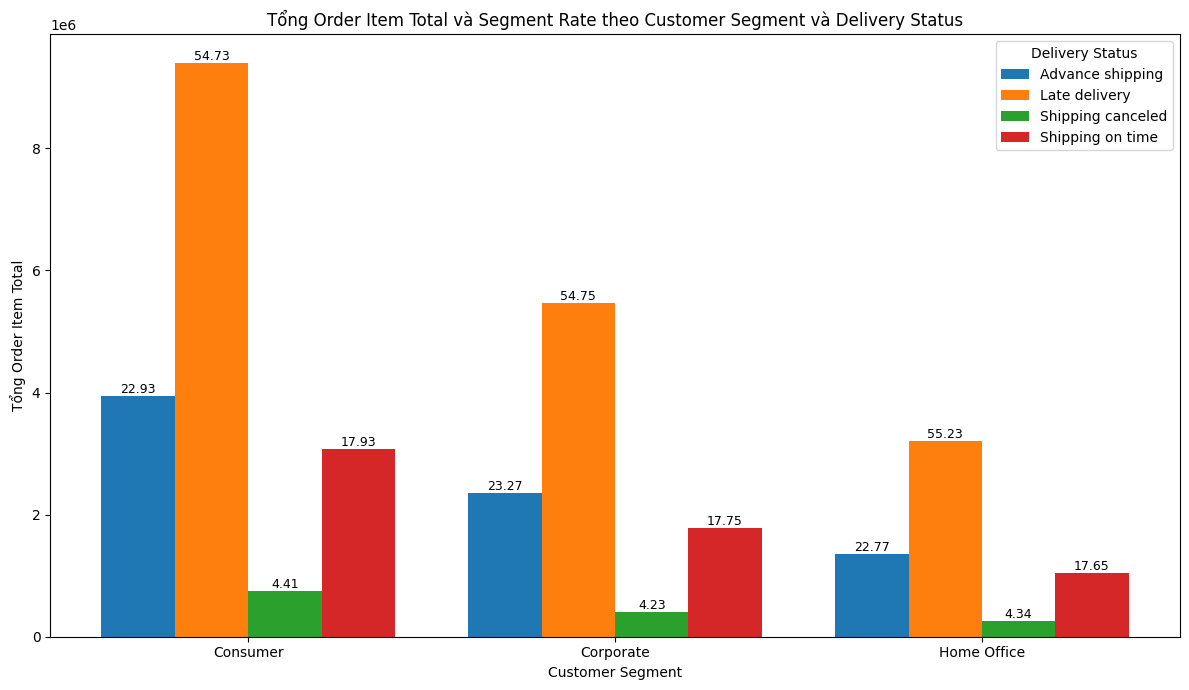

,Customer Segment,Delivery Status,Order Item Total,Segment Rate
0,Consumer,Advance shipping,3.945979e+06,0.229315
1,Consumer,Late delivery,9.396126e+06,0.547261
2,Consumer,Shipping canceled,7.467288e+05,0.044110
3,Consumer,Shipping on time,3.075445e+06,0.179314
4,Corporate,Advance shipping,2.360076e+06,0.232726
5,Corporate,Late delivery,5.473166e+06,0.547492
6,Corporate,Shipping canceled,4.095982e+05,0.042254
7,Corporate,Shipping on time,1.787810e+06,0.177528
8,Home Office,Advance shipping,1.350283e+06,0.227732
9,Home Office,Late delivery,3.213264e+06,0.552348


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Tính số lượng Order Id duy nhất theo Customer Segment và Delivery Status
count_segment_status = data.groupby(['Customer Segment', 'Delivery Status'])['Order Id'].nunique().reset_index(name='Count Segment Status')

# 2. Tính tổng số Order Id duy nhất theo Customer Segment
count_segment = data.groupby('Customer Segment')['Order Id'].nunique().reset_index(name='Count Segment')

# 3. Tính Segment rate = Count Segment Status / Count Segment
segment_rate = pd.merge(count_segment_status, count_segment, on='Customer Segment')
segment_rate['Segment Rate'] = (segment_rate['Count Segment Status'] / segment_rate['Count Segment'])*100

# 4. Tính tổng Order Item Total theo Customer Segment và Delivery Status
order_item_sum = data.groupby(['Customer Segment', 'Delivery Status'])['Order Item Total'].sum().reset_index()

# 5. Gộp dữ liệu tổng Order Item Total với Segment Rate
plot_data = pd.merge(order_item_sum, segment_rate[['Customer Segment', 'Delivery Status', 'Segment Rate']], on=['Customer Segment', 'Delivery Status'])

# 6. Vẽ biểu đồ cột nhóm với label Segment Rate

# Chuẩn bị dữ liệu cho plot
categories = plot_data['Customer Segment'].unique()
delivery_statuses = plot_data['Delivery Status'].unique()
x = np.arange(len(categories))
width = 0.8 / len(delivery_statuses)  # Chiều rộng mỗi cột trong nhóm

fig, ax = plt.subplots(figsize=(12, 7))

for i, status in enumerate(delivery_statuses):
    subset = plot_data[plot_data['Delivery Status'] == status]
    positions = x - 0.4 + i * width + width/2
    bars = ax.bar(positions, subset['Order Item Total'], width, label=status)
    
    # Thêm label Segment Rate trên mỗi cột
    for bar, rate in zip(bars, subset['Segment Rate']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{rate:.2f}', ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Customer Segment')
ax.set_ylabel('Tổng Order Item Total')
ax.set_title('Tổng Order Item Total và Segment Rate theo Customer Segment và Delivery Status')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(title='Delivery Status')

plt.tight_layout()
plt.show()
# Tính số lượng Order Id duy nhất theo Customer Segment và Delivery Status
count_segment_status = data.groupby(['Customer Segment', 'Delivery Status'])['Order Id'].nunique().reset_index(name='Count Segment Status')

# Tính tổng số Order Id duy nhất theo Customer Segment
count_segment = data.groupby('Customer Segment')['Order Id'].nunique().reset_index(name='Count Segment')

# Tính Segment rate = Count Segment Status / Count Segment
segment_rate = pd.merge(count_segment_status, count_segment, on='Customer Segment')
segment_rate['Segment Rate'] = segment_rate['Count Segment Status'] / segment_rate['Count Segment']

# Tính tổng Order Item Total theo Customer Segment và Delivery Status
order_item_sum = data.groupby(['Customer Segment', 'Delivery Status'])['Order Item Total'].sum().reset_index()

# Gộp dữ liệu tổng Order Item Total với Segment Rate
plot_data = pd.merge(order_item_sum, segment_rate[['Customer Segment', 'Delivery Status', 'Segment Rate']], on=['Customer Segment', 'Delivery Status'])

# Hiển thị dataframe
plot_data


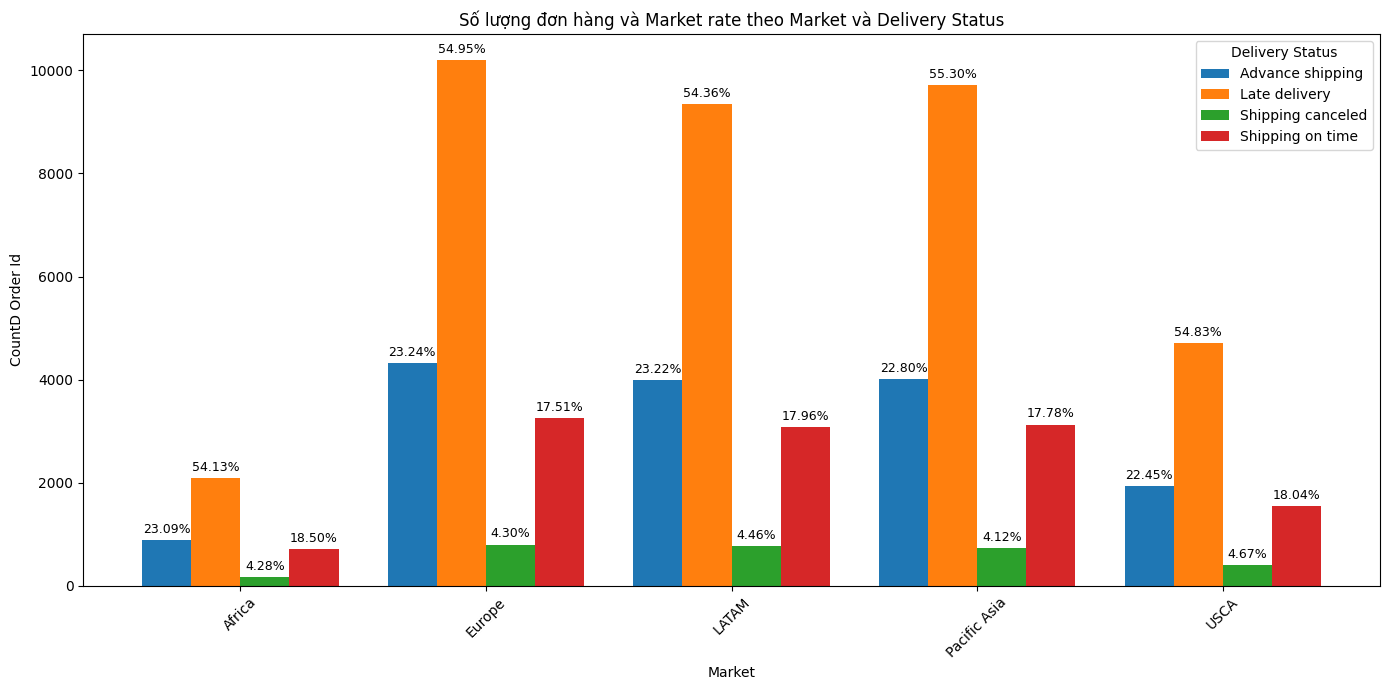

,Market,Delivery Status,CountD Order Id,Total CountD Order Id,Market rate
0,Africa,Advance shipping,890,3854,0.230929
1,Africa,Late delivery,2086,3854,0.541256
2,Africa,Shipping canceled,165,3854,0.042813
3,Africa,Shipping on time,713,3854,0.185003
4,Europe,Advance shipping,4314,18561,0.232423
5,Europe,Late delivery,10199,18561,0.549485
6,Europe,Shipping canceled,798,18561,0.042993
7,Europe,Shipping on time,3250,18561,0.175098
8,LATAM,Advance shipping,3990,17181,0.232233
9,LATAM,Late delivery,9339,17181,0.543566


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Tính số lượng Order Id duy nhất theo Market và Delivery Status
countd_status = data.groupby(['Market', 'Delivery Status'])['Order Id'].nunique().reset_index(name='CountD Order Id')

# 2. Tính tổng số Order Id duy nhất theo Market
countd_market = data.groupby('Market')['Order Id'].nunique().reset_index(name='Total CountD Order Id')

# 3. Gộp để tính Market rate
merged = countd_status.merge(countd_market, on='Market')
merged['Market rate'] = merged['CountD Order Id'] / merged['Total CountD Order Id']

# 4. Vẽ biểu đồ cột nhóm (grouped bar chart)
markets = merged['Market'].unique()
delivery_statuses = merged['Delivery Status'].unique()
x = np.arange(len(markets))
width = 0.8 / len(delivery_statuses)  # Chiều rộng cột chia đều theo số Delivery Status

fig, ax = plt.subplots(figsize=(14, 7))

for i, status in enumerate(delivery_statuses):
    vals = []
    labels = []
    for market in markets:
        val = merged[(merged['Market'] == market) & (merged['Delivery Status'] == status)]['CountD Order Id']
        rate = merged[(merged['Market'] == market) & (merged['Delivery Status'] == status)]['Market rate']
        if not val.empty:
            vals.append(val.values[0])
            labels.append(rate.values[0])
        else:
            vals.append(0)
            labels.append(0)
    bars = ax.bar(x + i*width - width*(len(delivery_statuses)-1)/2, vals, width, label=status)
    # Thêm label Market rate trên cột
    for bar, label in zip(bars, labels):
        height = bar.get_height()
        ax.annotate(f'{label:.2%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Market')
ax.set_ylabel('CountD Order Id')
ax.set_title('Số lượng đơn hàng và Market rate theo Market và Delivery Status')
ax.set_xticks(x)
ax.set_xticklabels(markets, rotation=45)
ax.legend(title='Delivery Status')
plt.tight_layout()
plt.show()
# Tính số lượng Order Id duy nhất theo Market và Delivery Status
countd_status = data.groupby(['Market', 'Delivery Status'])['Order Id'].nunique().reset_index(name='CountD Order Id')

# Tính tổng số Order Id duy nhất theo Market
countd_market = data.groupby('Market')['Order Id'].nunique().reset_index(name='Total CountD Order Id')

# Gộp để tính Market rate
merged = countd_status.merge(countd_market, on='Market')
merged['Market rate'] = merged['CountD Order Id'] / merged['Total CountD Order Id']

# Hiển thị dataframe
merged


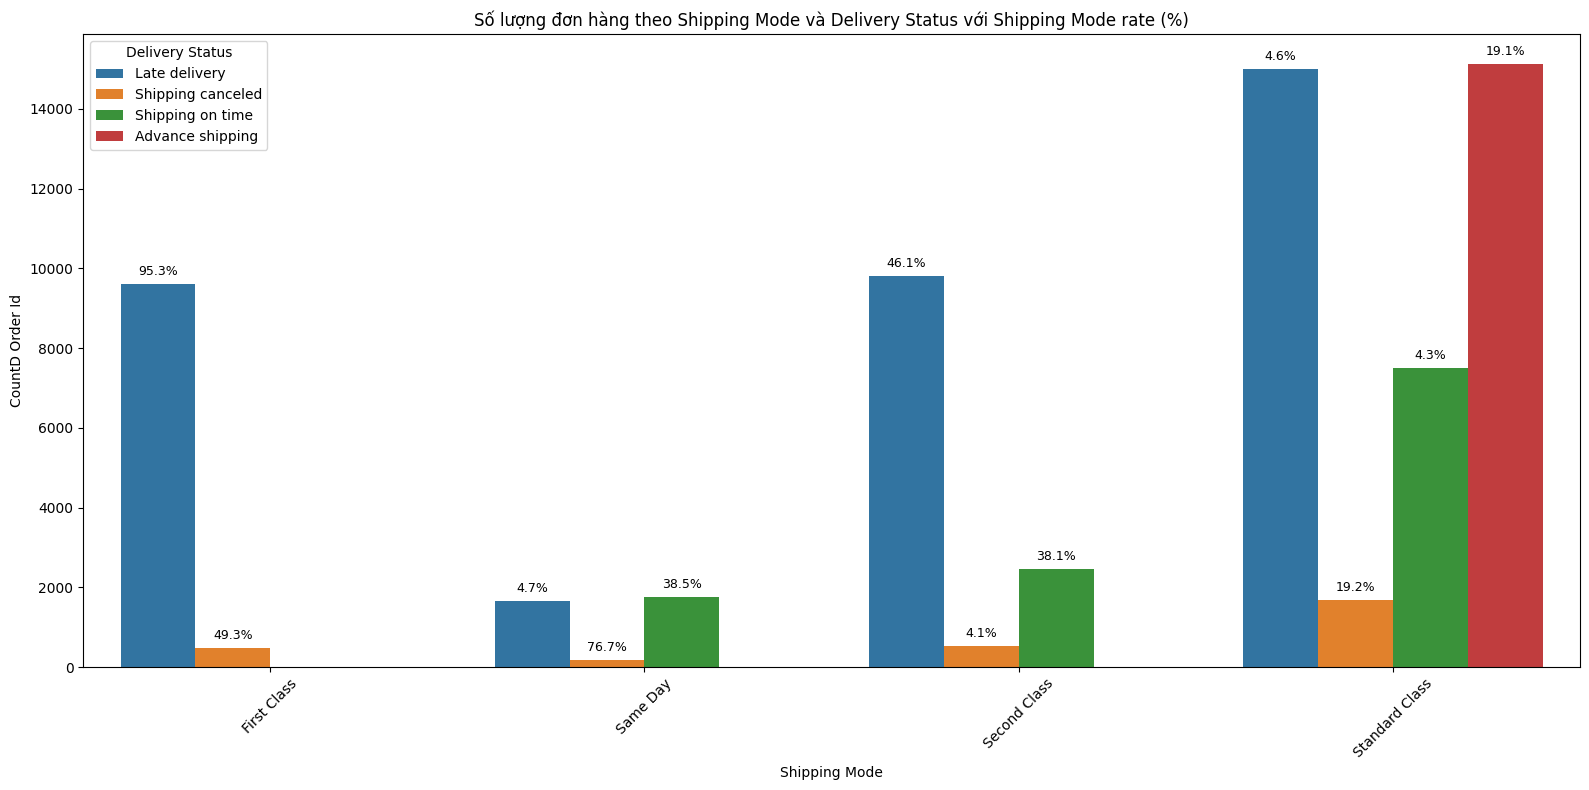

,Shipping Mode,Delivery Status,CountD Order Id,CountD Shipping,Shipping Mode rate
0,First Class,Late delivery,9602,10079,0.952674
1,First Class,Shipping canceled,477,10079,0.047326
2,Same Day,Late delivery,1648,3571,0.461495
3,Same Day,Shipping canceled,164,3571,0.045926
4,Same Day,Shipping on time,1759,3571,0.492579
5,Second Class,Late delivery,9803,12778,0.767178
6,Second Class,Shipping canceled,522,12778,0.040851
7,Second Class,Shipping on time,2453,12778,0.191971
8,Standard Class,Advance shipping,15127,39324,0.384676
9,Standard Class,Late delivery,14995,39324,0.381319


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tính số lượng đơn hàng duy nhất theo Shipping Mode và Delivery Status
countd_shipping_status = data.groupby(['Shipping Mode', 'Delivery Status'])['Order Id'].nunique().reset_index(name='CountD Order Id')

# 2. Tính tổng số đơn hàng duy nhất theo Shipping Mode
countd_shipping = data.groupby('Shipping Mode')['Order Id'].nunique().reset_index(name='CountD Shipping')

# 3. Tính Shipping Mode rate
merged = countd_shipping_status.merge(countd_shipping, on='Shipping Mode')
merged['Shipping Mode rate'] = merged['CountD Order Id'] / merged['CountD Shipping']

# 4. Vẽ biểu đồ cột với legend theo Delivery Status
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=merged, x='Shipping Mode', y='CountD Order Id', hue='Delivery Status')

# 5. Thêm nhãn tỷ lệ Shipping Mode rate (%)
for i, row in merged.iterrows():
    # Tìm vị trí thanh tương ứng
    # Cách đơn giản: sử dụng vị trí index trên trục x + offset theo hue
    # Tuy nhiên seaborn không cung cấp vị trí trực tiếp, ta dùng ax.patches
    pass

# Cách thêm nhãn dựa trên patches matplotlib
for patch, (_, row) in zip(ax.patches, merged.iterrows()):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + max(merged['CountD Order Id'])*0.01, 
            f"{row['Shipping Mode rate']*100:.1f}%", 
            ha='center', va='bottom', fontsize=9)

plt.title('Số lượng đơn hàng theo Shipping Mode và Delivery Status với Shipping Mode rate (%)')
plt.xlabel('Shipping Mode')
plt.ylabel('CountD Order Id')
plt.xticks(rotation=45)
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()
# Tính số lượng đơn hàng duy nhất theo Shipping Mode và Delivery Status
countd_shipping_status = data.groupby(['Shipping Mode', 'Delivery Status'])['Order Id'].nunique().reset_index(name='CountD Order Id')

# Tính tổng số đơn hàng duy nhất theo Shipping Mode
countd_shipping = data.groupby('Shipping Mode')['Order Id'].nunique().reset_index(name='CountD Shipping')

# Tính Shipping Mode rate
merged = countd_shipping_status.merge(countd_shipping, on='Shipping Mode')
merged['Shipping Mode rate'] = merged['CountD Order Id'] / merged['CountD Shipping']

# Hiển thị dataframe
merged


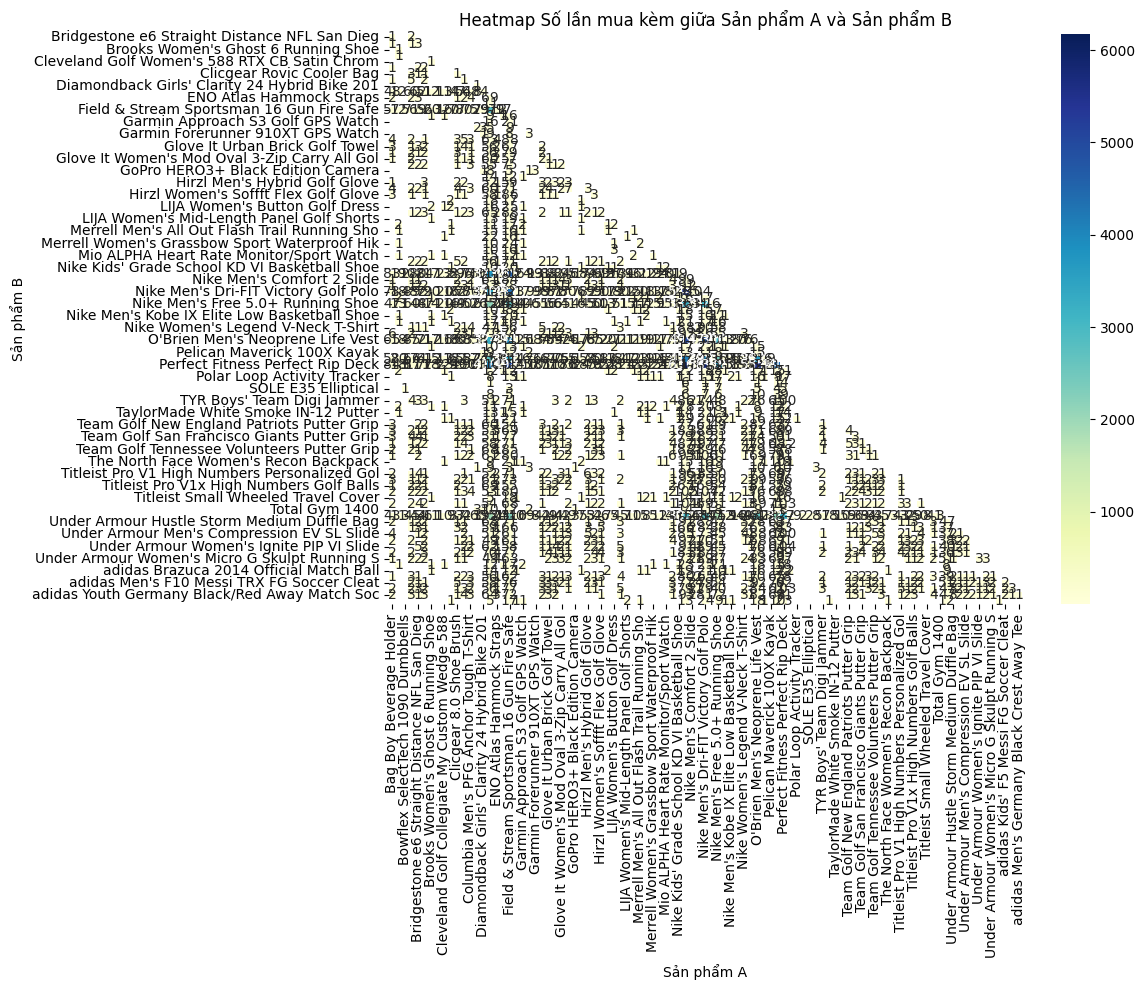

,Số lần mua kèm,Sản phẩm A,Sản phẩm B
0,5442,Nike Men's CJ Elite 2 TD Football Cleat,Nike Men's Dri-FIT Victory Golf Polo
1,4129,Nike Men's CJ Elite 2 TD Football Cleat,Pelican Sunstream 100 Kayak
2,3990,Nike Men's Dri-FIT Victory Golf Polo,Pelican Sunstream 100 Kayak
3,4795,Nike Men's Dri-FIT Victory Golf Polo,O'Brien Men's Neoprene Life Vest
4,5890,Nike Men's Dri-FIT Victory Golf Polo,Perfect Fitness Perfect Rip Deck
...,...,...,...
1856,4,Pelican Sunstream 100 Kayak,SOLE E35 Elliptical
1857,1,Bushnell Pro X7 Jolt Slope Rangefinder,Nike Men's CJ Elite 2 TD Football Cleat
1858,1,Nike Men's Dri-FIT Victory Golf Polo,SOLE E25 Elliptical
1859,1,Pelican Sunstream 100 Kayak,SOLE E25 Elliptical


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file Excel
df = pd.read_excel('product_pair_migrated.xlsx')

# Tạo bảng pivot cho heatmap
pivot_table = df.pivot(index='Sản phẩm B', columns='Sản phẩm A', values='Số lần mua kèm')

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')

plt.title('Heatmap Số lần mua kèm giữa Sản phẩm A và Sản phẩm B')
plt.xlabel('Sản phẩm A')
plt.ylabel('Sản phẩm B')
plt.tight_layout()
plt.show()
df


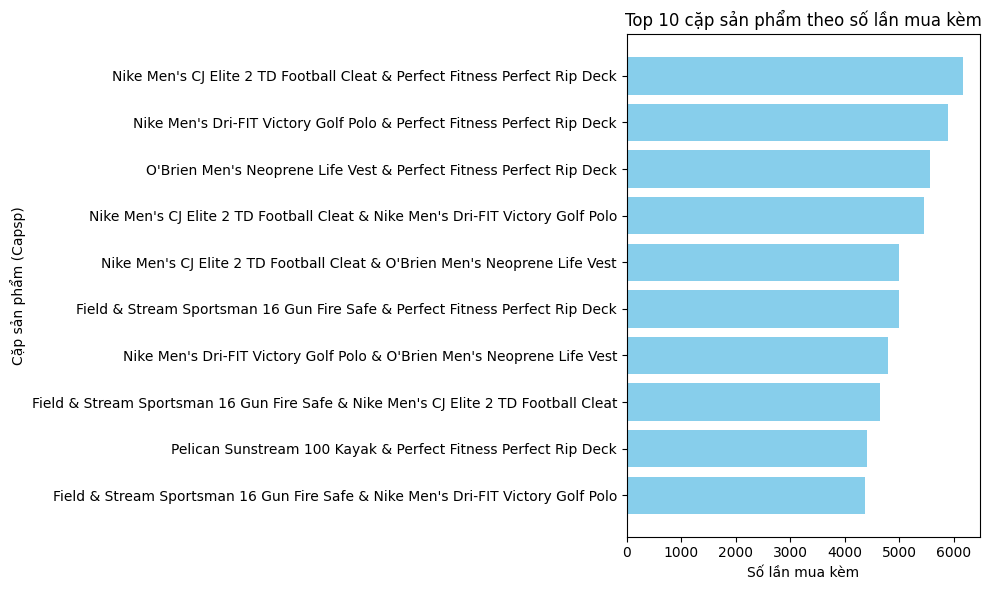

,Số lần mua kèm,Sản phẩm A,Sản phẩm B,Capsp
13,6169,Nike Men's CJ Elite 2 TD Football Cleat,Perfect Fitness Perfect Rip Deck,Nike Men's CJ Elite 2 TD Football Cleat & Perf...
4,5890,Nike Men's Dri-FIT Victory Golf Polo,Perfect Fitness Perfect Rip Deck,Nike Men's Dri-FIT Victory Golf Polo & Perfect...
6,5556,O'Brien Men's Neoprene Life Vest,Perfect Fitness Perfect Rip Deck,O'Brien Men's Neoprene Life Vest & Perfect Fit...
0,5442,Nike Men's CJ Elite 2 TD Football Cleat,Nike Men's Dri-FIT Victory Golf Polo,Nike Men's CJ Elite 2 TD Football Cleat & Nike...
12,4991,Nike Men's CJ Elite 2 TD Football Cleat,O'Brien Men's Neoprene Life Vest,Nike Men's CJ Elite 2 TD Football Cleat & O'Br...
41,4984,Field & Stream Sportsman 16 Gun Fire Safe,Perfect Fitness Perfect Rip Deck,Field & Stream Sportsman 16 Gun Fire Safe & Pe...
3,4795,Nike Men's Dri-FIT Victory Golf Polo,O'Brien Men's Neoprene Life Vest,Nike Men's Dri-FIT Victory Golf Polo & O'Brien...
56,4651,Field & Stream Sportsman 16 Gun Fire Safe,Nike Men's CJ Elite 2 TD Football Cleat,Field & Stream Sportsman 16 Gun Fire Safe & Ni...
42,4400,Pelican Sunstream 100 Kayak,Perfect Fitness Perfect Rip Deck,Pelican Sunstream 100 Kayak & Perfect Fitness ...
34,4371,Field & Stream Sportsman 16 Gun Fire Safe,Nike Men's Dri-FIT Victory Golf Polo,Field & Stream Sportsman 16 Gun Fire Safe & Ni...


In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file Excel (nếu chưa đọc)
df = pd.read_excel('product_pair_migrated.xlsx')

# Tạo biến Capsp
df['Capsp'] = df['Sản phẩm A'] + ' & ' + df['Sản phẩm B']

# Lấy top 10 theo 'Số lần mua kèm'
top10 = df.nlargest(10, 'Số lần mua kèm')

# Vẽ bar chart ngang
plt.figure(figsize=(10, 6))
plt.barh(top10['Capsp'], top10['Số lần mua kèm'], color='skyblue')
plt.xlabel('Số lần mua kèm')
plt.ylabel('Cặp sản phẩm (Capsp)')
plt.title('Top 10 cặp sản phẩm theo số lần mua kèm')
plt.gca().invert_yaxis()  # Đảo ngược trục y để cặp có giá trị cao nhất lên trên
plt.tight_layout()
plt.show()
top10


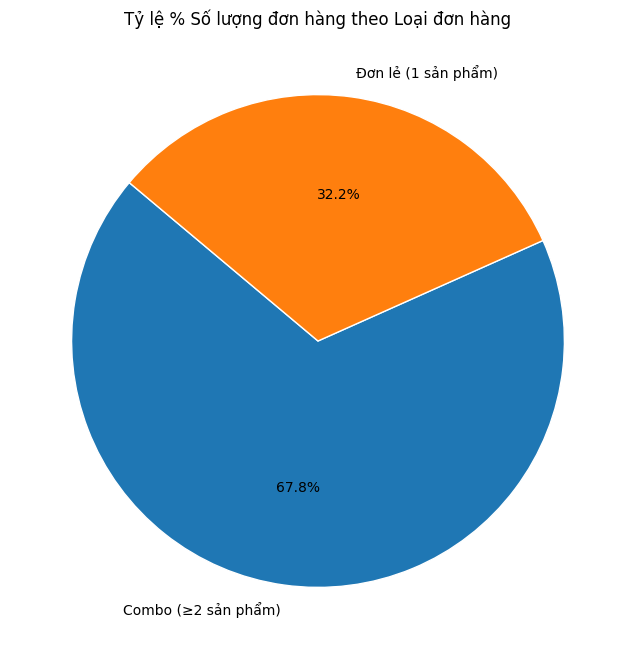

,Loại đơn hàng,Số lượng đơn hàng,Phần trăm (%)
0,Combo (≥2 sản phẩm),44578,67.8
1,Đơn lẻ (1 sản phẩm),21174,32.2


In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file Excel
data = pd.read_excel('order_combo_ratio_migrated.xlsx')

# Tổng hợp dữ liệu theo 'Loại đơn hàng'
grouped = data.groupby('Loại đơn hàng')['Số lượng đơn hàng'].sum()

# Vẽ pie chart với giá trị hiển thị %
plt.figure(figsize=(8, 8))
plt.pie(
    grouped,
    labels=grouped.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(edgecolor='w')
)

plt.title('Tỷ lệ % Số lượng đơn hàng theo Loại đơn hàng')
plt.show()
# Tính tổng số lượng đơn hàng
total_orders = df_grouped['Số lượng đơn hàng'].sum()
df_grouped = grouped.reset_index(name='Số lượng đơn hàng')


# Tính phần trăm cho từng loại đơn hàng
df_grouped['Phần trăm (%)'] = (df_grouped['Số lượng đơn hàng'] / total_orders * 100).round(2)

# Hiển thị dataframe có thêm cột phần trăm
df_grouped


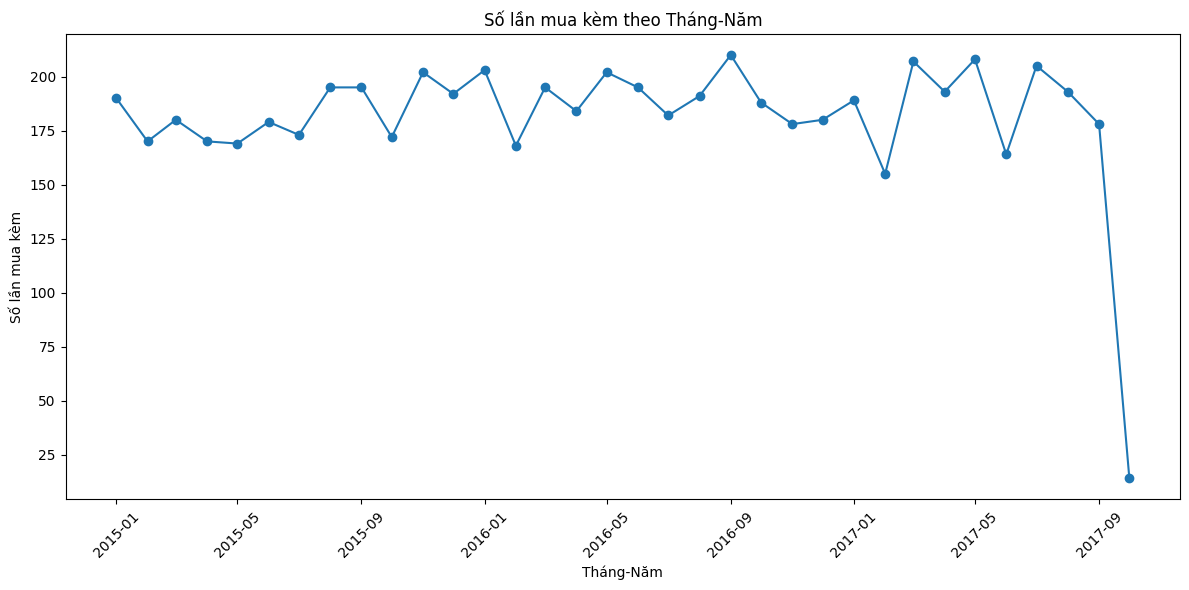

,Sản phẩm A,Sản phẩm B,Tháng-Năm,Số lần mua kèm,CapSP
170,Nike Men's CJ Elite 2 TD Football Cleat,Perfect Fitness Perfect Rip Deck,2015-01-01,190,Nike Men's CJ Elite 2 TD Football Cleat & Perf...
173,Nike Men's CJ Elite 2 TD Football Cleat,Perfect Fitness Perfect Rip Deck,2015-02-01,170,Nike Men's CJ Elite 2 TD Football Cleat & Perf...
176,Nike Men's CJ Elite 2 TD Football Cleat,Perfect Fitness Perfect Rip Deck,2015-03-01,180,Nike Men's CJ Elite 2 TD Football Cleat & Perf...
179,Nike Men's CJ Elite 2 TD Football Cleat,Perfect Fitness Perfect Rip Deck,2015-04-01,170,Nike Men's CJ Elite 2 TD Football Cleat & Perf...
182,Nike Men's CJ Elite 2 TD Football Cleat,Perfect Fitness Perfect Rip Deck,2015-05-01,169,Nike Men's CJ Elite 2 TD Football Cleat & Perf...
185,Nike Men's CJ Elite 2 TD Football Cleat,Perfect Fitness Perfect Rip Deck,2015-06-01,179,Nike Men's CJ Elite 2 TD Football Cleat & Perf...
188,Nike Men's CJ Elite 2 TD Football Cleat,Perfect Fitness Perfect Rip Deck,2015-07-01,173,Nike Men's CJ Elite 2 TD Football Cleat & Perf...
191,Nike Men's CJ Elite 2 TD Football Cleat,Perfect Fitness Perfect Rip Deck,2015-08-01,195,Nike Men's CJ Elite 2 TD Football Cleat & Perf...
194,Nike Men's CJ Elite 2 TD Football Cleat,Perfect Fitness Perfect Rip Deck,2015-09-01,195,Nike Men's CJ Elite 2 TD Football Cleat & Perf...
197,Nike Men's CJ Elite 2 TD Football Cleat,Perfect Fitness Perfect Rip Deck,2015-10-01,172,Nike Men's CJ Elite 2 TD Football Cleat & Perf...


In [114]:
import matplotlib.pyplot as plt

# Sắp xếp dataframe theo cột 'Tháng-Năm' tăng dần
df_filtered = df_filtered.sort_values('Tháng-Năm')

# Vẽ biểu đồ line chart
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Tháng-Năm'], df_filtered['Số lần mua kèm'], marker='o', linestyle='-')

plt.xlabel('Tháng-Năm')
plt.ylabel('Số lần mua kèm')
plt.title('Số lần mua kèm theo Tháng-Năm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_filtered
